# Exploratory Data Analysis using Python (Tutorial)

## The first step for any Python project is to create a virtual environment, activate it and install and import the libraries.

This tutorial was made in VSCode. If you want to follow along, please setup VSCode on your system.
If you're an advanced user, you can use any IDE or environment to perform the following steps.
In your terminal, create a virtual environment at the root of your project.

Access terminal in VSCode by accessing the top menu Terminal function.

```cmd
python -m venv eda_venv
```

Once you've created the environment, select the same kernel for this project. This tutorial was made in VSCode.
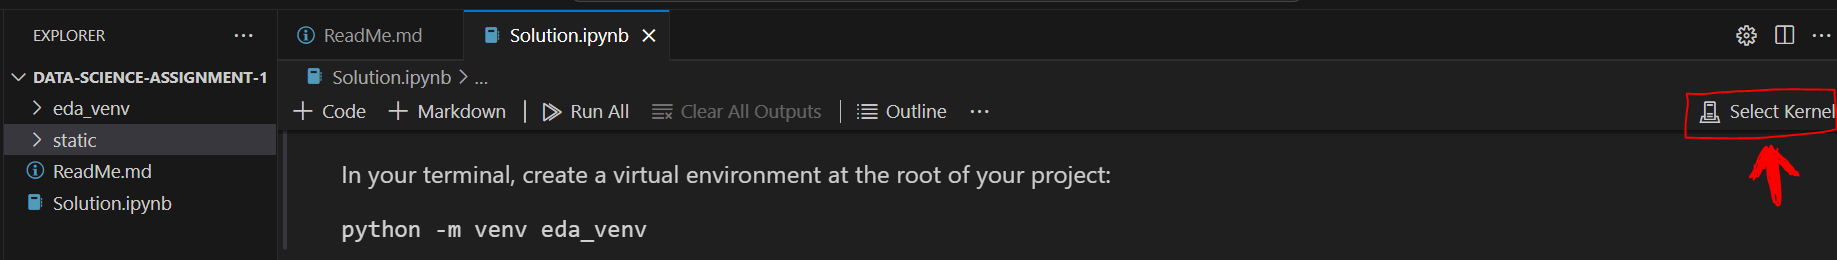

Select the kernal you just created virtual environment for

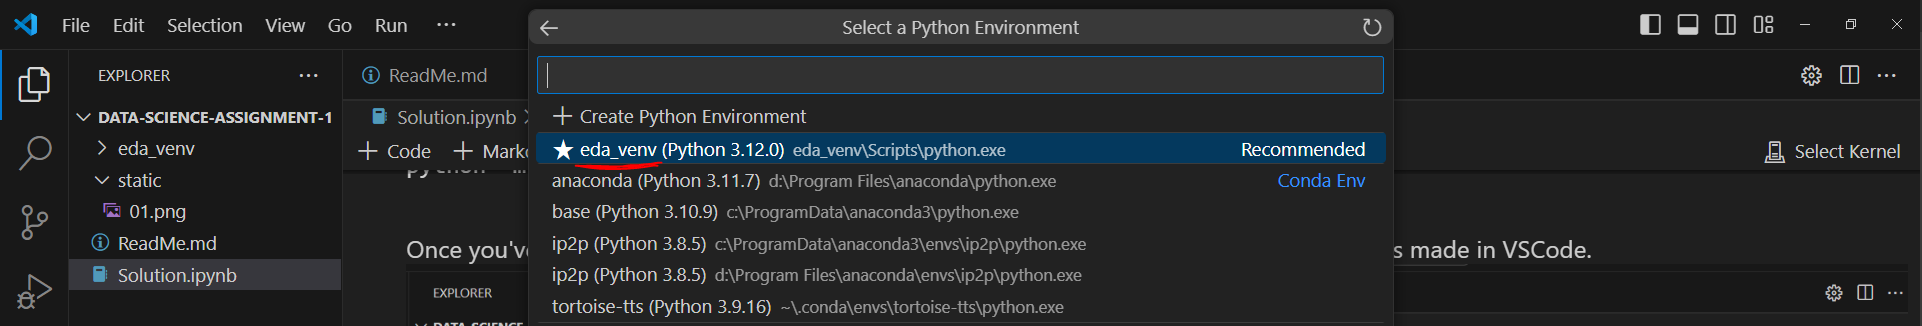

### Follow Along after the environment has been setup correctly.

When trying to run the following code block for the first time, you will be prompted to install the iPykernel. Click on install.
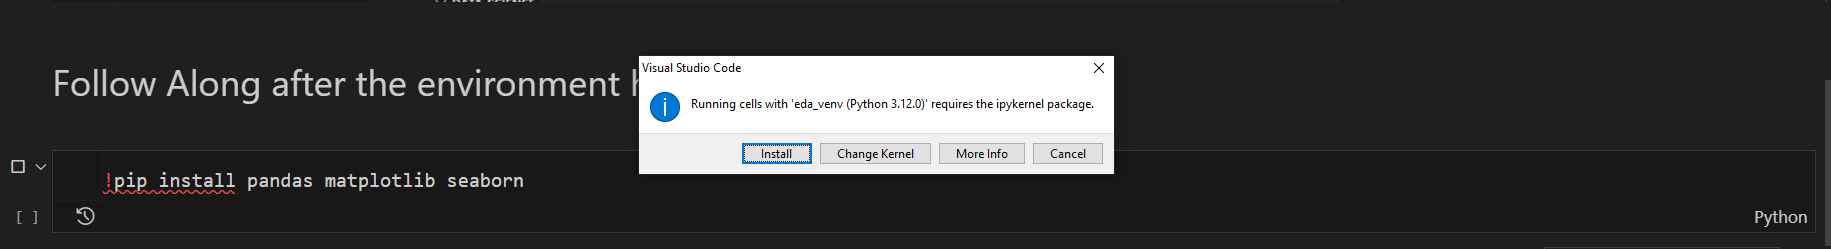

In [1]:
! pip install pandas matplotlib seaborn scipy


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Next we will import all the libraries we just installed, to use in our project.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np                                       # We probably won't use numpy directly, but import it just in case
from scipy.stats import norm, ttest_ind, f_oneway        # The SciPy library allows us to perform scientific calculations quickly

## Now we load the data

In [3]:
# load the csv supplied. Understand each parameter of the function you're calling

df = pd.read_csv("./data/spotify_youtube_sample.csv", index_col=[0])

## Once loaded, let's see the data and clean it!

In [4]:
# Set these flags so we can see all data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 30)

In [5]:
df.head()

Artist                                        Url_spotify  \
0         Charlie Puth  https://open.spotify.com/artist/6VuMaDnrHyPL1p...   
1  Angus & Julia Stone  https://open.spotify.com/artist/4tvKz56Tr39bkh...   
2          George Ezra  https://open.spotify.com/artist/2ysnwxxNtSgbb9...   
3        Playboi Carti  https://open.spotify.com/artist/699OTQXzgjhIYA...   
4          Abel Pintos  https://open.spotify.com/artist/6HTUcOExehqydq...   

                                        Track                Album Album_type  \
0  We Don't Talk Anymore (feat. Selena Gomez)      Nine Track Mind      album   
1                          Santa Monica Dream         Down the Way      album   
2                                Hold My Girl  Staying at Tamara's      album   
3           Fell In Luv (feat. Bryson Tiller)              Die Lit      album   
4                                     Motivos                 Abel      album   

                                    Uri  Danceability  Energy   Key  Loudness  \
0  spotify:track:37FXw5QGFN7uwwsLy8uAc0         0.728   0.563   1.0    -8.053   
1  spotify:track:2aaHkPnIpvGRD1FEnKYIte         0.621   0.261   5.0   -13.805   
2  spotify:track:42bbDWZ8WmXTH7PkYAlGLu         0.614   0.527  10.0    -6.374   
3  spotify:track:1s9DTymg5UQrdorZf43JQm         0.657   0.668   2.0    -6.208   
4  spotify:track:2n8VYWU3mMrziR2ua8leHu         0.732   0.490   7.0    -8.359   

   Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0       0.1340        0.6210              0.00     0.179   0.3520  100.017   
1       0.0340        0.9100              0.06     0.109   0.0702  121.071   
2       0.0302        0.5970              0.00     0.110   0.3540  121.941   
3       0.1360        0.0273              0.00     0.320   0.2270  162.997   
4       0.0329        0.3260              0.00     0.113   0.6520  104.022   

   Duration_ms                                  Url_youtube  \
0     217707.0  https://www.youtube.com/watch?v=3AtDnEC4zak   
1     330307.0                                          NaN   
2     211764.0  https://www.youtube.com/watch?v=6Xlo2abddXU   
3     206333.0  https://www.youtube.com/watch?v=NbbSXcJ41Fg   
4     181933.0  https://www.youtube.com/watch?v=URlg_bziE9w   

                                               Title         Channel  \
0  Charlie Puth - We Don't Talk Anymore (feat. Se...    Charlie Puth   
1                                                NaN             NaN   
2        George Ezra - Hold My Girl (Official Video)  GeorgeEzraVEVO   
3  Playboi Carti - Fell In Luv (Official Audio) f...   Playboi Carti   
4         Abel Pintos - Motivos (Vídeo oficial) [HD]    juampy oliva   

          Views       Likes  Comments  \
0  2.925710e+09  13643149.0  395627.0   
1           NaN         NaN       NaN   
2  2.771348e+07    168883.0    4743.0   
3  4.454693e+06     91199.0    1952.0   
4  3.627860e+05      1057.0      21.0   

                                         Description Licensed official_video  \
0  Charlie Puth - We Don't Talk Anymore (feat. Se...     True           True   
1                                                NaN      NaN            NaN   
2  George Ezra - Hold My Girl (Official Video)\nT...     True           True   
3  Playboi Carti - Fell In Luv (Official Audio) f...    False           True   
4  "Cómo te explico lo esencial de tu existencia ...    False          False   

         Stream  
0  1.468032e+09  
1  4.084215e+07  
2  2.657910e+08  
3  2.282542e+08  
4  3.030110e+07

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2071
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            2072 non-null   object 
 1   Url_spotify       2072 non-null   object 
 2   Track             2072 non-null   object 
 3   Album             2072 non-null   object 
 4   Album_type        2072 non-null   object 
 5   Uri               2072 non-null   object 
 6   Danceability      2072 non-null   float64
 7   Energy            2072 non-null   float64
 8   Key               2072 non-null   float64
 9   Loudness          2072 non-null   float64
 10  Speechiness       2072 non-null   float64
 11  Acousticness      2072 non-null   float64
 12  Instrumentalness  2072 non-null   float64
 13  Liveness          2072 non-null   float64
 14  Valence           2072 non-null   float64
 15  Tempo             2072 non-null   float64
 16  Duration_ms       2072 non-null   float64
 17  

In [7]:
# For the numerical columns, we can get an overview of the statistics

df.describe()

Danceability       Energy          Key     Loudness  Speechiness  \
count   2072.000000  2072.000000  2072.000000  2072.000000  2072.000000   
mean       0.622164     0.630088     5.148166    -7.697532     0.095257   
std        0.163178     0.211739     3.469778     4.567330     0.112318   
min        0.000000     0.002290     0.000000   -38.901000     0.000000   
25%        0.520000     0.505750     2.000000    -8.875750     0.035875   
50%        0.640000     0.664500     5.000000    -6.568000     0.049900   
75%        0.739000     0.789250     8.000000    -4.951000     0.102000   
max        0.965000     0.998000    11.000000     0.829000     0.951000   

       Acousticness  Instrumentalness     Liveness      Valence        Tempo  \
count   2072.000000       2072.000000  2072.000000  2072.000000  2072.000000   
mean       0.286968          0.053034     0.186689     0.528605   120.707066   
std        0.284683          0.187353     0.162022     0.244206    28.959171   
min        0.000002          0.000000     0.015700     0.000000     0.000000   
25%        0.042775          0.000000     0.093475     0.338750    97.649500   
50%        0.191000          0.000002     0.123000     0.533500   119.983500   
75%        0.472250          0.000345     0.220000     0.720000   139.096000   
max        0.996000          0.999000     0.983000     0.991000   206.198000   

        Duration_ms         Views         Likes      Comments        Stream  
count  2.072000e+03  2.025000e+03  2.015000e+03  2.014000e+03  1.998000e+03  
mean   2.222618e+05  1.011395e+08  6.798592e+05  2.879789e+04  1.323074e+08  
std    1.211179e+05  3.484988e+08  2.069682e+06  1.634407e+05  2.286898e+08  
min    3.100000e+04  7.000000e+00  0.000000e+00  0.000000e+00  1.071000e+04  
25%    1.788200e+05  1.754147e+06  2.238000e+04  5.435000e+02  1.775370e+07  
50%    2.116735e+05  1.466866e+07  1.247100e+05  3.369000e+03  5.078392e+07  
75%    2.481435e+05  6.989099e+07  5.007205e+05  1.417725e+04  1.399548e+08  
max    4.676058e+06  8.079649e+09  5.078865e+07  4.252791e+06  2.067689e+09

Immediately we see missing data. There might be other issues as well. Let's focus more and find how we can mitigate some of the issues.
A general rule of thumb is to drop any column which has more than 70% missing data.

In [8]:
# Let's find the percent of null values in each column

df.isna().mean() * 100

Artist              0.000000
Url_spotify         0.000000
Track               0.000000
Album               0.000000
Album_type          0.000000
Uri                 0.000000
Danceability        0.000000
Energy              0.000000
Key                 0.000000
Loudness            0.000000
Speechiness         0.000000
Acousticness        0.000000
Instrumentalness    0.000000
Liveness            0.000000
Valence             0.000000
Tempo               0.000000
Duration_ms         0.000000
Url_youtube         2.268340
Title               2.268340
Channel             2.268340
Views               2.268340
Likes               2.750965
Comments            2.799228
Description         4.198842
Licensed            2.268340
official_video      2.268340
Stream              3.571429
dtype: float64

In [9]:
# Get the names of the columns which have the null values. Since none of them are drastic, we can choose to fill the numerical ones.

columns_with_null = df.columns[df.isna().mean() > 0].tolist()
print(columns_with_null)

['Url_youtube', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video', 'Stream']


In [10]:
# We also want to get the numerical columns and the object columns separately

object_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

In [11]:
# Nice, now we've separated object columns and numerical columns

# For the object columns, we probably won't be able to fill them up, if they are not categorical. Let's check!

null_and_object_overlap = list(set(columns_with_null).intersection(set(object_columns)))

print(null_and_object_overlap)

['Description', 'Channel', 'official_video', 'Licensed', 'Url_youtube', 'Title']


In [12]:
# for these columns, let's verify how many unique values are there. We can infer that Description, URL, Title and Channel will not be categories and will contain many unique values.

for column in null_and_object_overlap:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")

Description: 1931 unique values
Channel: 1497 unique values
official_video: 2 unique values
Licensed: 2 unique values
Url_youtube: 1990 unique values
Title: 1990 unique values


### From the above analysis, we can conclude that Description, URL, Title and Channel have missing values and there's no way for us to fill them. We have two choices, we can either drop the records (rows) which have missing values, or we can drop the columns from all data, if we believe these columns won't add value to our analysis. Let us drop the columns Description, URL, Title and Channel. And drop the empty records for the columns Licensed and official_video.

In [13]:
# Determine if column has 2 unique entries or more than 2 unique entries.
# 2 unique entries will go into drop_row_based_on. More than 2 will go into drop_column.

drop_row_based_on = []
drop_column = []

# Use vectorized operation to count unique values in each column
unique_counts = df[null_and_object_overlap].nunique()

# Categorize columns based on the number of unique values
drop_row_based_on = unique_counts[unique_counts == 2].index.tolist()
drop_column = unique_counts[unique_counts > 2].index.tolist()

print("Columns to drop rows for:", drop_row_based_on)
print("Columns to drop:", drop_column)


Columns to drop rows for: ['official_video', 'Licensed']
Columns to drop: ['Description', 'Channel', 'Url_youtube', 'Title']


In [14]:
# Dropping specified columns
df = df.drop(columns=drop_column)

# Dropping rows with missing values in specified columns
df = df.dropna(subset=drop_row_based_on)

### One set of cleaning done. Let's look at the status now.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 0 to 2071
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            2025 non-null   object 
 1   Url_spotify       2025 non-null   object 
 2   Track             2025 non-null   object 
 3   Album             2025 non-null   object 
 4   Album_type        2025 non-null   object 
 5   Uri               2025 non-null   object 
 6   Danceability      2025 non-null   float64
 7   Energy            2025 non-null   float64
 8   Key               2025 non-null   float64
 9   Loudness          2025 non-null   float64
 10  Speechiness       2025 non-null   float64
 11  Acousticness      2025 non-null   float64
 12  Instrumentalness  2025 non-null   float64
 13  Liveness          2025 non-null   float64
 14  Valence           2025 non-null   float64
 15  Tempo             2025 non-null   float64
 16  Duration_ms       2025 non-null   float64
 17  

In [16]:
df.isna().mean() * 100

Artist              0.000000
Url_spotify         0.000000
Track               0.000000
Album               0.000000
Album_type          0.000000
Uri                 0.000000
Danceability        0.000000
Energy              0.000000
Key                 0.000000
Loudness            0.000000
Speechiness         0.000000
Acousticness        0.000000
Instrumentalness    0.000000
Liveness            0.000000
Valence             0.000000
Tempo               0.000000
Duration_ms         0.000000
Views               0.000000
Likes               0.493827
Comments            0.543210
Licensed            0.000000
official_video      0.000000
Stream              3.555556
dtype: float64

### Nice, after that operation, we didn't lose too many data points. We started with 2072 data points, and now we have 2025 data points. Moreover, the cleaning also reduced some nulls from the numerical columns. The null percentage for Likes is only 0.49%, Comments is only 0.54% and Stream is 3.55%. For these, we will try to impute them.

### Let's first visualize the range and spread of the columns with missing value.

In [17]:
columns_to_visualize = df.columns[df.isna().mean() > 0].tolist()
print(columns_to_visualize)

['Likes', 'Comments', 'Stream']


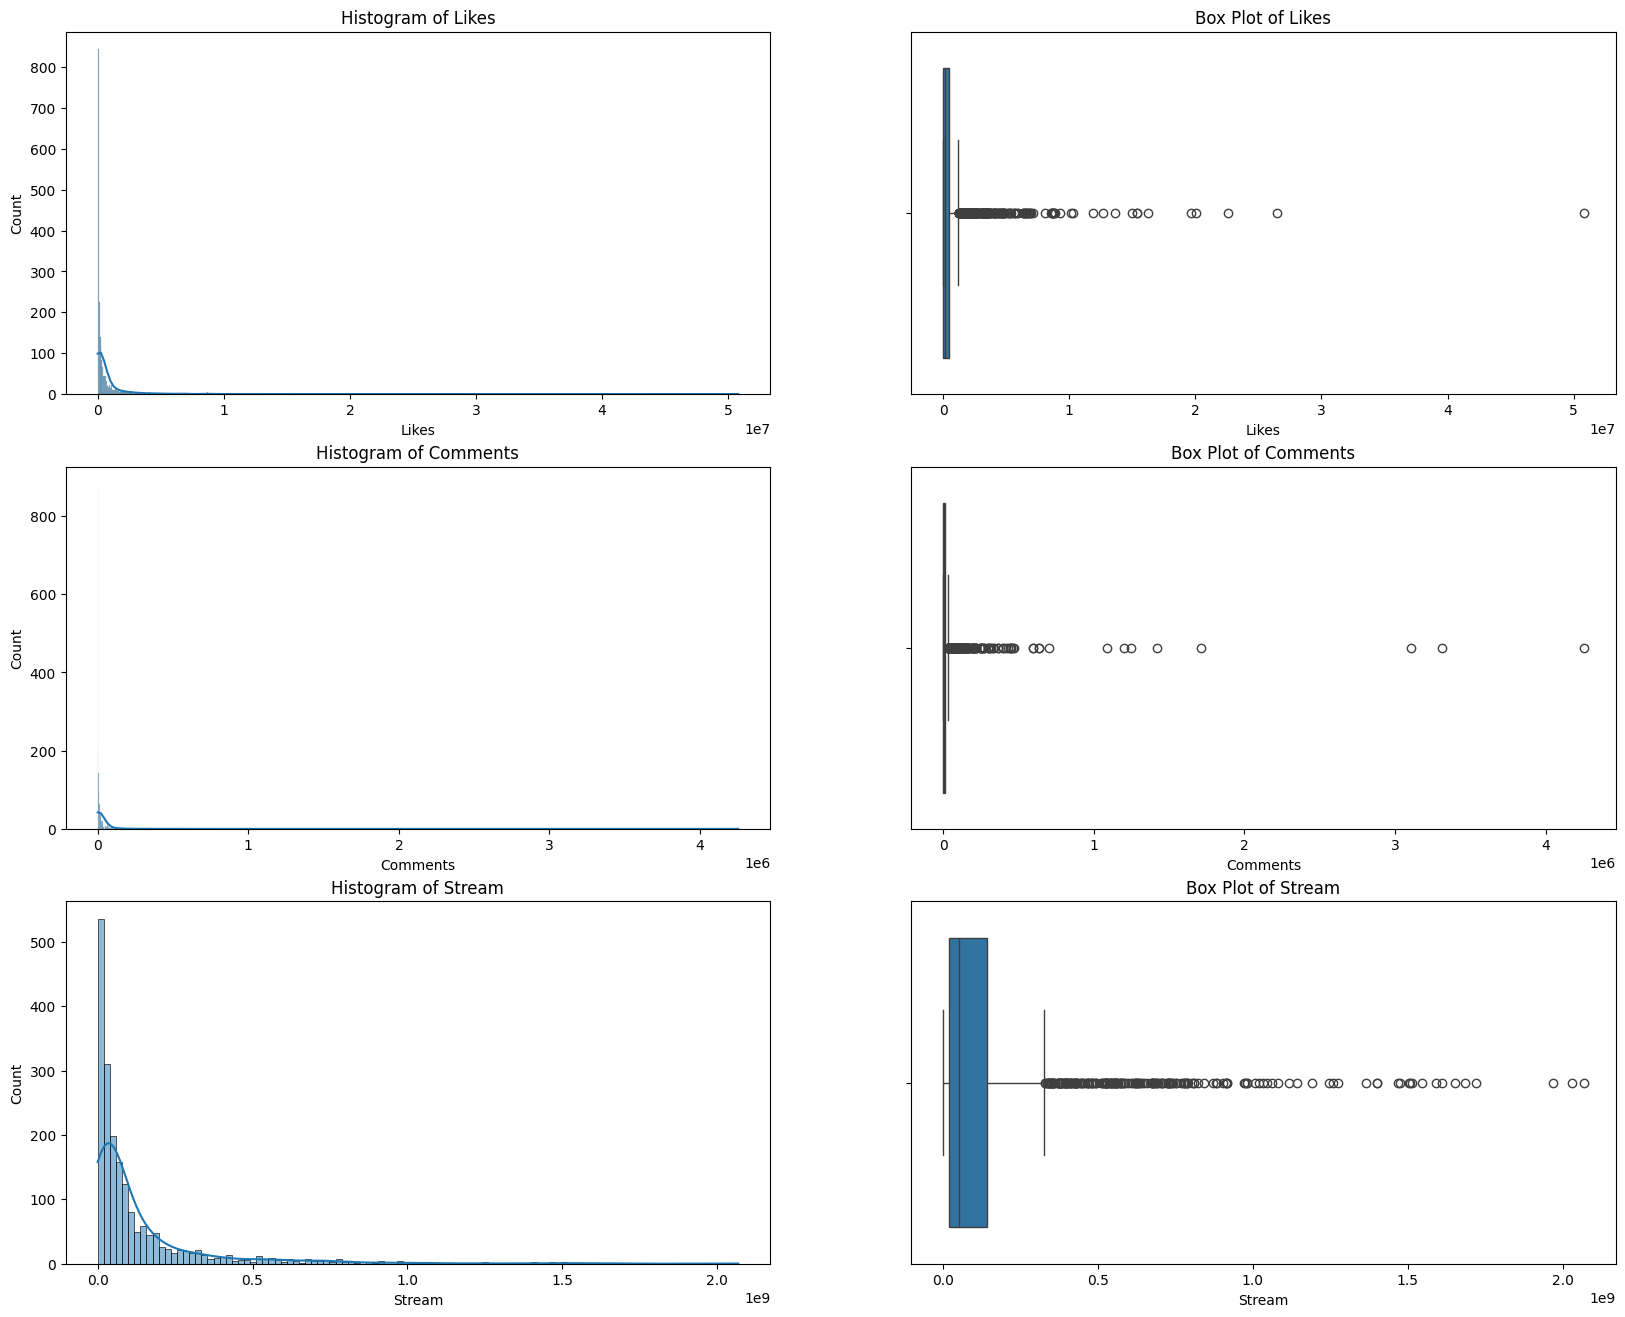

In [18]:
# Please understand each and every methods used here. If you don't understand something, ask your mentor.
# It is extremely important that you are able to recall and perform these operations on your own.
# No need for memorization, but being able to recall that a function exists which can be called.

plt.figure(figsize=(20, 16))
for idx, column in enumerate(columns_to_visualize):
    plt.subplot(3, 2, (2 * idx) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(3, 2, (2 * idx) + 2)
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
plt.show()

### Wow! Could we have guessed that there exist so many outliers? Now, there are two ways of imputing values:
1. We find the data points that are very similar to the ones with missing entries and then impute them. This implies we define what `similar` means, and then find these similar data points. This method can become extremely complex, and we will look at this later.
2. Alternatively, we can use sample statistics, like mean and median, to fill them in. This approach is simpler and often effective, especially when dealing with skewed distributions.

In [19]:
for column in columns_to_visualize:
    mean_val = df[column].mean()
    median_val = df[column].median()

    # let's check if mean and median are within 10% of each other
    if np.abs(mean_val - median_val) / np.abs(mean_val) < 0.1:
        # if they are within 10% of each other, we can use mean to fill
        df[column] = df[column].fillna(mean_val)
        print(f"{column} imputed using mean!")
    else:
        # otherwise we will use median
        df[column] = df[column].fillna(median_val)
        print(f"{column} imputed using median!")

Likes imputed using median!
Comments imputed using median!
Stream imputed using median!


In [20]:
# let's check all data has been cleaned

df.isna().mean() * 100

Artist              0.0
Url_spotify         0.0
Track               0.0
Album               0.0
Album_type          0.0
Uri                 0.0
Danceability        0.0
Energy              0.0
Key                 0.0
Loudness            0.0
Speechiness         0.0
Acousticness        0.0
Instrumentalness    0.0
Liveness            0.0
Valence             0.0
Tempo               0.0
Duration_ms         0.0
Views               0.0
Likes               0.0
Comments            0.0
Licensed            0.0
official_video      0.0
Stream              0.0
dtype: float64

### Nice, no more missing data. But are we done? Perhaps not, let us get the numerical columns and the object columns from our cleaned dataset now.

In [21]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print(f"Object columns: {object_columns}")
print(f"Numerical columns: {numerical_columns}")

Object columns: ['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Licensed', 'official_video']
Numerical columns: ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']


In [22]:
# Let's take a look at the object columns data and see if we need all of them for our analysis

df[object_columns].head()

Artist                                        Url_spotify  \
0   Charlie Puth  https://open.spotify.com/artist/6VuMaDnrHyPL1p...   
2    George Ezra  https://open.spotify.com/artist/2ysnwxxNtSgbb9...   
3  Playboi Carti  https://open.spotify.com/artist/699OTQXzgjhIYA...   
4    Abel Pintos  https://open.spotify.com/artist/6HTUcOExehqydq...   
5  The Kid LAROI  https://open.spotify.com/artist/2tIP7SsRs7vjIc...   

                                               Track                Album  \
0         We Don't Talk Anymore (feat. Selena Gomez)      Nine Track Mind   
2                                       Hold My Girl  Staying at Tamara's   
3                  Fell In Luv (feat. Bryson Tiller)              Die Lit   
4                                            Motivos                 Abel   
5  Hate The Other Side (with Marshmello & The Kid...    Legends Never Die   

  Album_type                                   Uri Licensed official_video  
0      album  spotify:track:37FXw5QGFN7uwwsLy8uAc0     True           True  
2      album  spotify:track:42bbDWZ8WmXTH7PkYAlGLu     True           True  
3      album  spotify:track:1s9DTymg5UQrdorZf43JQm    False           True  
4      album  spotify:track:2n8VYWU3mMrziR2ua8leHu    False          False  
5      album  spotify:track:0ada5XsQGLPUVbmTCkAP49    False           True

In [23]:
# From the above sample, we can see we don't need Url_spotify and Uri. We can keep Artist, and Album to see who or which albums are more popular. 
# Track could also be put against each other to make some comments. The rest of them (Album_type, Licensed, official_video) are categories.

df = df.drop(columns=["Url_spotify", "Uri"])
object_columns = df.select_dtypes(include=['object']).columns.tolist()  # update the object_columns

## We're done with cleaning for now. If you want to perform additional steps, please do so. Further ahead, there might be requirement to convert the categorical features (columns) to numbers. Next we start our analysis. Typically Univariate and Bivariate analysis is carried out to visualize any patterns or correlations among the features.

In [24]:
# Let's start our analysis by looking at the frequency of artists and albums.

artist_frequency = df['Artist'].value_counts()
album_tracks = df['Album'].value_counts()

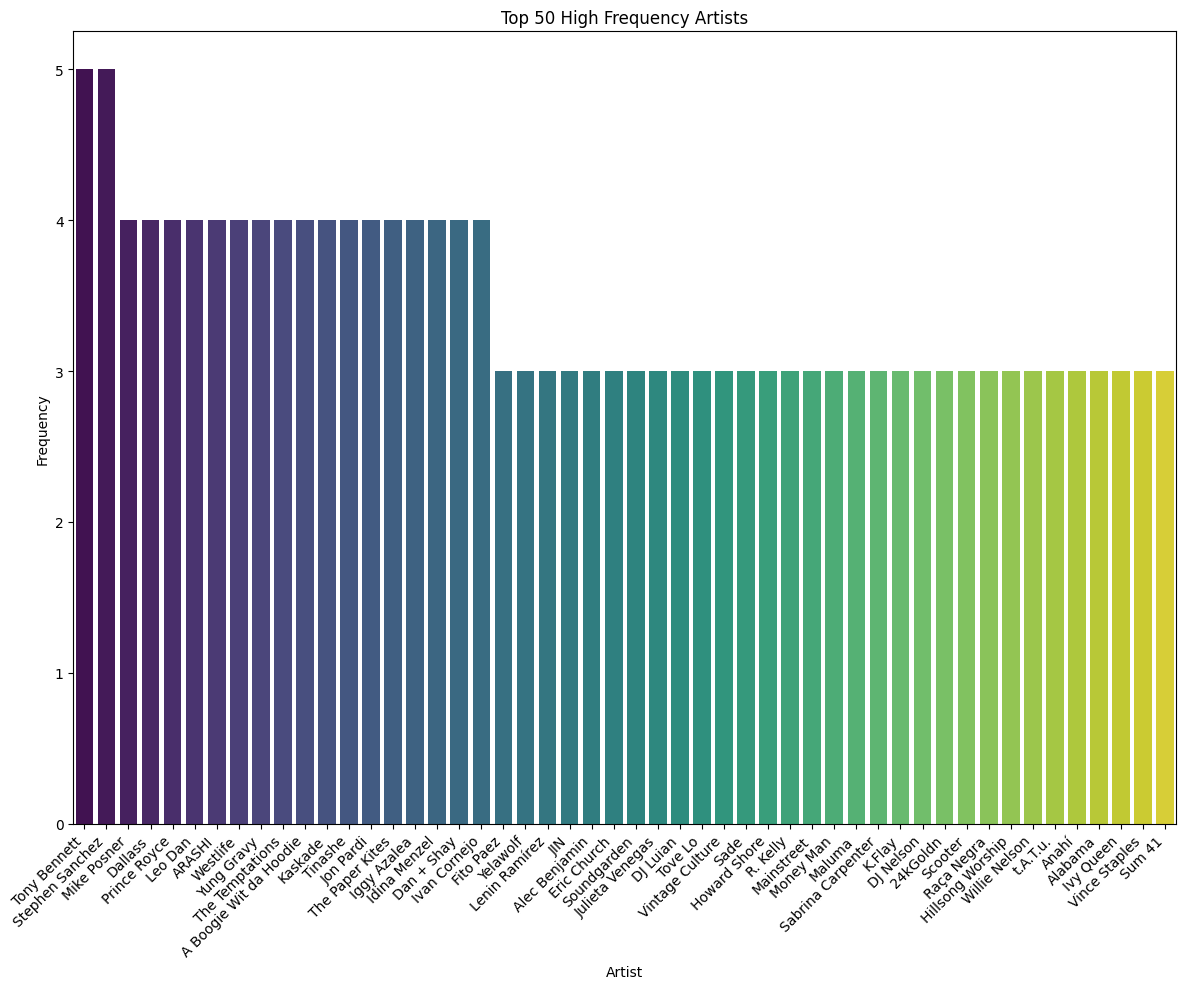

In [25]:
plt.figure(figsize=(12, 10))
plot = sns.barplot(x=artist_frequency.head(50).index, y=artist_frequency.head(50).values, hue=artist_frequency.head(50).index, palette="viridis", dodge=False, legend=False)
plt.ylabel('Frequency')
plt.xlabel('Artist')
plt.title('Top 50 High Frequency Artists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

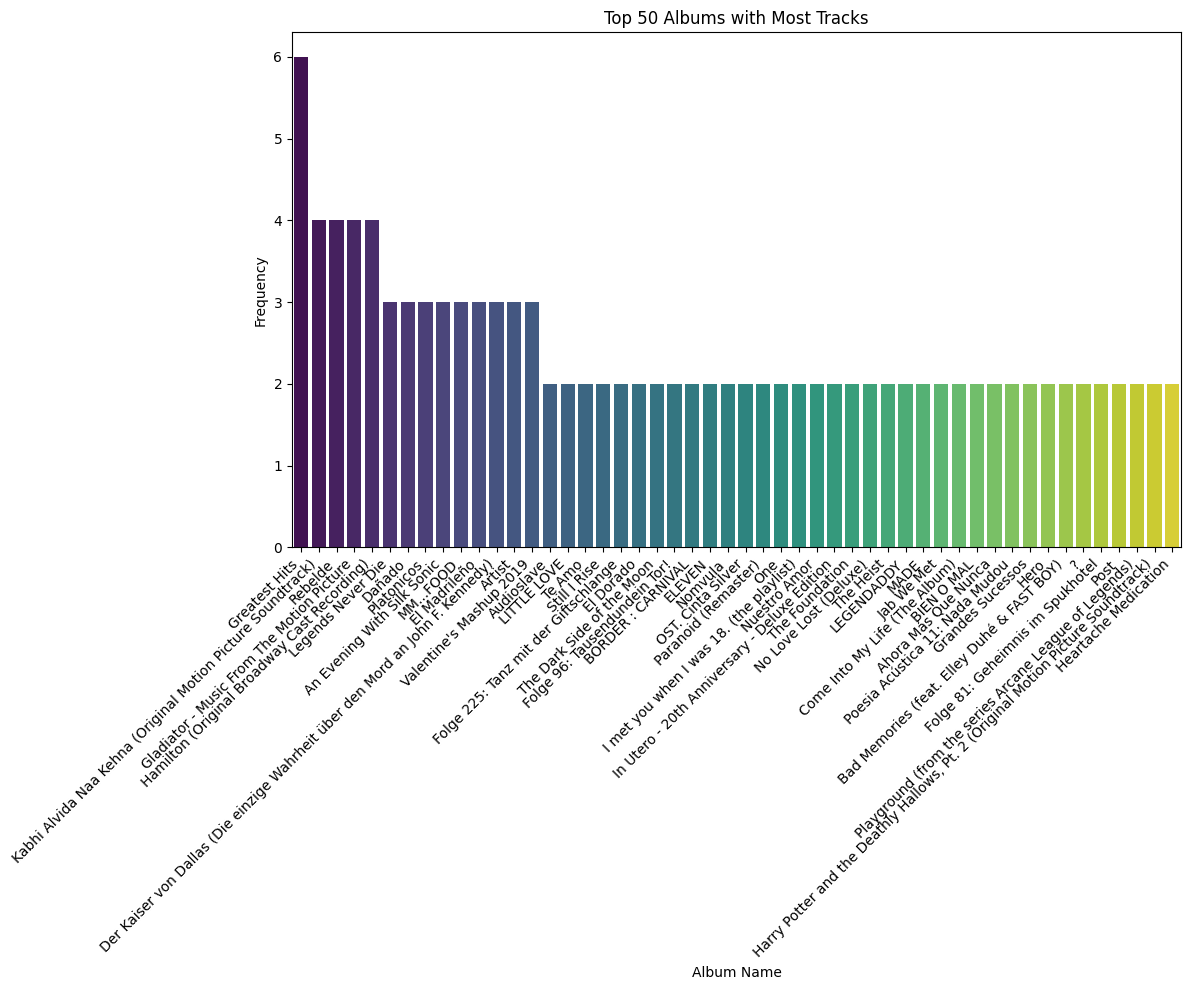

In [26]:
plt.figure(figsize=(12, 10))
plot = sns.barplot(x=album_tracks.head(50).index, y=album_tracks.head(50).values, hue=album_tracks.head(50).index, palette="viridis", dodge=False, legend=False)
plt.ylabel('Frequency')
plt.xlabel('Album Name')
plt.title('Top 50 Albums with Most Tracks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Nice, we have an overview of which artists appear more frequently in our dataset, and which albums have the most songs. (No surprise it's an album called `Greatest Hits` 🙄)

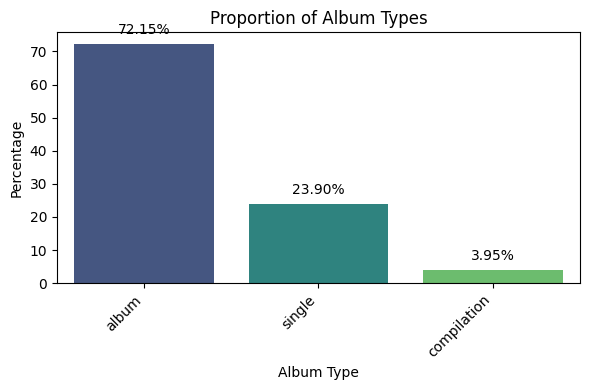

In [27]:
# We want to verify what is the proportion of album vs singles, let's visualize to see if that's true.
album_type_proportion = df['Album_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
plot = sns.barplot(x=album_type_proportion.index, y=album_type_proportion.values, hue=album_type_proportion.index, palette="viridis", dodge=False, legend=False)

for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.ylabel('Percentage')
plt.xlabel('Album Type')
plt.title('Proportion of Album Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Majority of Songs in our dataset is from an album. Good to know!

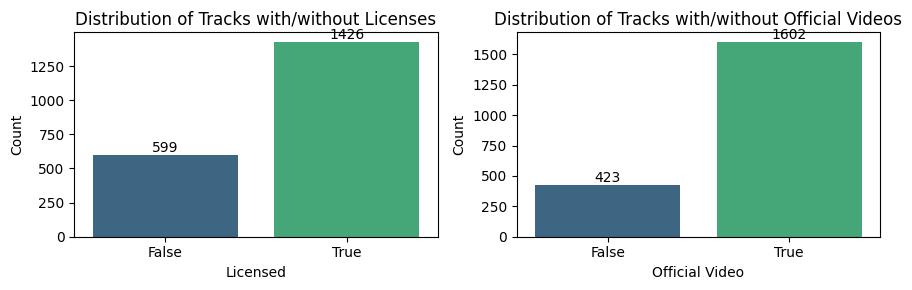

In [28]:
plt.figure(figsize=(9, 3))

# Distribution of tracks with and without licenses
plt.subplot(1, 2, 1)
plot1 = sns.countplot(x='Licensed', data=df, palette="viridis", hue="Licensed", legend=False)
for p in plot1.patches:
    plot1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Licensed')
plt.ylabel('Count')
plt.title('Distribution of Tracks with/without Licenses')

# Distribution of tracks with and without official videos
plt.subplot(1, 2, 2)
plot2 = sns.countplot(x='official_video', data=df, palette="viridis", hue="official_video", legend=False)
for p in plot2.patches:
    plot2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Official Video')
plt.ylabel('Count')
plt.title('Distribution of Tracks with/without Official Videos')

plt.tight_layout()
plt.show()

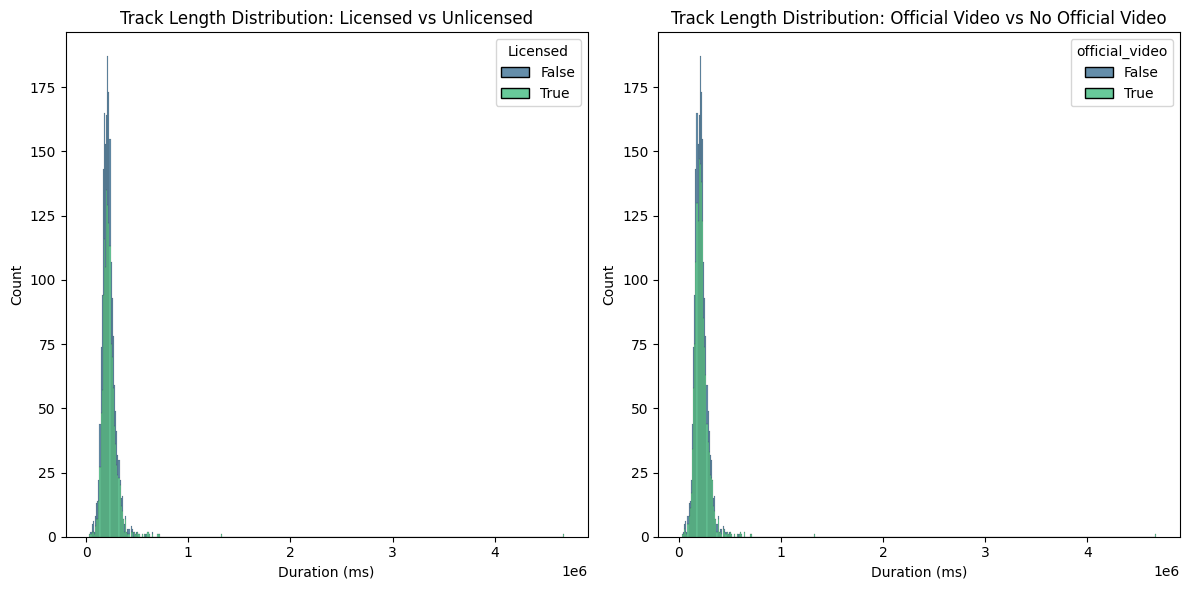

In [29]:
plt.figure(figsize=(12, 6))

# Track length distribution for licensed and unlicensed tracks
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Duration_ms', hue='Licensed', multiple="stack", palette="viridis")
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.title('Track Length Distribution: Licensed vs Unlicensed')

# Track length distribution for tracks with and without official videos
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Duration_ms', hue='official_video', multiple="stack", palette="viridis")
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.title('Track Length Distribution: Official Video vs No Official Video')

plt.tight_layout()
plt.show()

### This is very hard to see. Let's scale the duration with log.

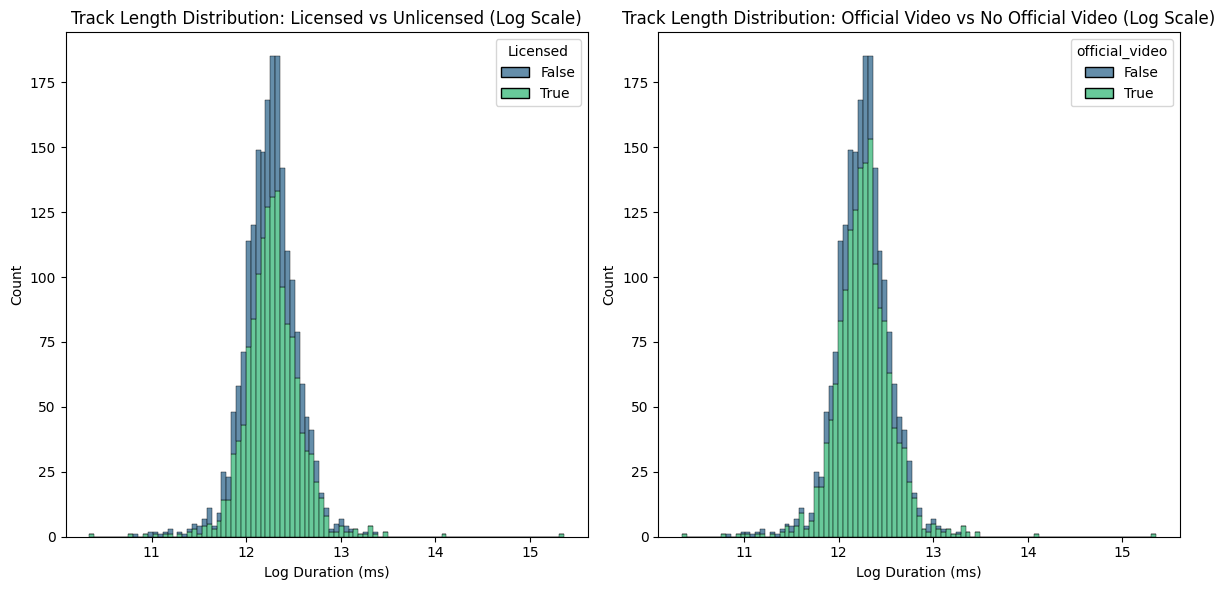

In [30]:
# Add a new column for the log-transformed duration
df['Log_Duration_ms'] = np.log1p(df['Duration_ms'])

plt.figure(figsize=(12, 6))

# Track length distribution for licensed and unlicensed tracks
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Log_Duration_ms', hue='Licensed', multiple="stack", palette="viridis")
plt.xlabel('Log Duration (ms)')
plt.ylabel('Count')
plt.title('Track Length Distribution: Licensed vs Unlicensed (Log Scale)')

# Track length distribution for tracks with and without official videos
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Log_Duration_ms', hue='official_video', multiple="stack", palette="viridis")
plt.xlabel('Log Duration (ms)')
plt.ylabel('Count')
plt.title('Track Length Distribution: Official Video vs No Official Video (Log Scale)')

plt.tight_layout()
plt.show()

By looking at these graphs of track length distribution for licensed vs unlicensed tracks and tracks with vs without official videos on a logarithmic scale, we can make the following observations:

1. **General Distribution Shape**:
   - Both graphs exhibit a similar general shape, indicating that the log-transformed duration (ms) of tracks is roughly normally distributed.
   - There are peaks around the same log duration value (approximately between 11 and 13), with most track durations falling within this range.

2. **Licensed vs Unlicensed Tracks**:
   - The distribution of licensed and unlicensed tracks appears to be similar, indicating that the licensing status does not significantly affect track duration.
   - Both licensed and unlicensed tracks have their highest counts around the same log duration value, suggesting that the most common track lengths are similar regardless of licensing status.
   - The distribution of licensed tracks overlaps significantly with unlicensed tracks.

3. **Official Video vs No Official Video**:
   - Similarly, the distribution of tracks with and without official videos also shows a similar pattern.
   - Tracks with official videos have a slightly higher peak compared to those without official videos, suggesting a slight tendency for tracks with official videos to be more prevalent around the common track lengths.
   - This may indicate that the availability of an official video does not significantly affect track length.

#### Conclusion:
- Licenses and official videos do not appear to significantly impact the distribution of track duration.
- Most tracks, regardless of their licensing status or the presence of an official video, cluster around the same durations.
- This suggests that the factors influencing track duration might be more related to musical or industry standards rather than licensing or video availability.

#### One Key Point:
 **Log-Normal Distribution**:
   - When the log of a variable is normally distributed, it implies that the variable itself follows a log-normal distribution.
   - In a log-normal distribution, values are positively skewed, meaning there are a *larger number* of __smaller values__ and *fewer* __extremely large values__.

The fact that the log-transformed duration data is normally distributed means that the original duration data was right-skewed. This is typical for distributions involving time or length, where there are many short durations and a few very long durations. Using the log transformation aids in making such skewed data more conducive for statistical analysis and visualization.

Number of unique tracks: 1972
Number of duplicate tracks: 98


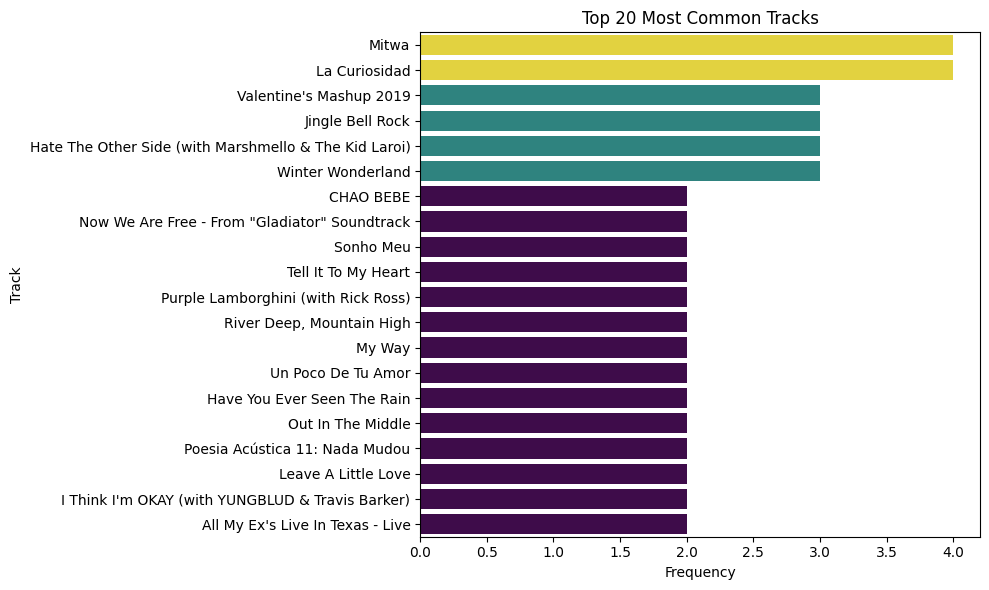

In [31]:
# let us identify if there are any duplicate tracks (with the exact same name, you could also use the URL to verify if they are the exact same)

# Step 1: Identify Unique Values
unique_tracks_count = df['Track'].nunique()
print(f"Number of unique tracks: {unique_tracks_count}")

# Step 2: Identify Duplicate Tracks
duplicates = df[df['Track'].duplicated(keep=False)]
print(f"Number of duplicate tracks: {duplicates.shape[0]}")

# Step 3: Frequency of Common Tracks
track_counts = df['Track'].value_counts()

# Visualize the top 20 most common tracks
plt.figure(figsize=(10, 6))
sns.barplot(y=track_counts.head(20).index, x=track_counts.head(20).values, palette="viridis", hue=track_counts.head(20).values, legend=False)
plt.xlabel('Frequency')
plt.ylabel('Track')
plt.title('Top 20 Most Common Tracks')
plt.tight_layout()
plt.show()

In [32]:
# Moving our focus to the numerical columns, let us see the overall statistics in one go

df.describe()

Danceability       Energy          Key    Loudness  Speechiness  \
count   2025.000000  2025.000000  2025.000000  2025.00000  2025.000000   
mean       0.622685     0.628805     5.159012    -7.69792     0.094887   
std        0.163278     0.211133     3.468719     4.54198     0.110554   
min        0.000000     0.002290     0.000000   -38.90100     0.000000   
25%        0.520000     0.505000     2.000000    -8.86900     0.035800   
50%        0.641000     0.662000     5.000000    -6.58100     0.049800   
75%        0.740000     0.786000     8.000000    -4.99100     0.102000   
max        0.965000     0.998000    11.000000     0.82900     0.951000   

       Acousticness  Instrumentalness     Liveness      Valence        Tempo  \
count   2025.000000       2025.000000  2025.000000  2025.000000  2025.000000   
mean       0.286210          0.053228     0.184522     0.528710   120.800171   
std        0.285048          0.187593     0.158527     0.244347    29.002685   
min        0.000002          0.000000     0.015700     0.000000     0.000000   
25%        0.043000          0.000000     0.093400     0.338000    97.676000   
50%        0.190000          0.000002     0.123000     0.533000   119.987000   
75%        0.471000          0.000365     0.218000     0.720000   139.509000   
max        0.996000          0.999000     0.983000     0.991000   206.198000   

        Duration_ms         Views         Likes      Comments        Stream  \
count  2.025000e+03  2.025000e+03  2.025000e+03  2.025000e+03  2.025000e+03   
mean   2.225452e+05  1.011395e+08  6.771178e+05  2.865976e+04  1.307030e+08   
std    1.220886e+05  3.484988e+08  2.064930e+06  1.630067e+05  2.272227e+08   
min    3.100000e+04  7.000000e+00  0.000000e+00  0.000000e+00  1.071000e+04   
25%    1.788520e+05  1.754147e+06  2.240700e+04  5.450000e+02  1.862045e+07   
50%    2.118570e+05  1.466866e+07  1.247100e+05  3.369000e+03  5.110841e+07   
75%    2.481330e+05  6.989099e+07  4.942840e+05  1.389100e+04  1.327998e+08   
max    4.676058e+06  8.079649e+09  5.078865e+07  4.252791e+06  2.067689e+09   

       Log_Duration_ms  
count      2025.000000  
mean         12.260686  
std           0.302750  
min          10.341775  
25%          12.094320  
50%          12.263672  
75%          12.421724  
max          15.357966

#### Let us verify how many of the numerical features follow a normal distribution

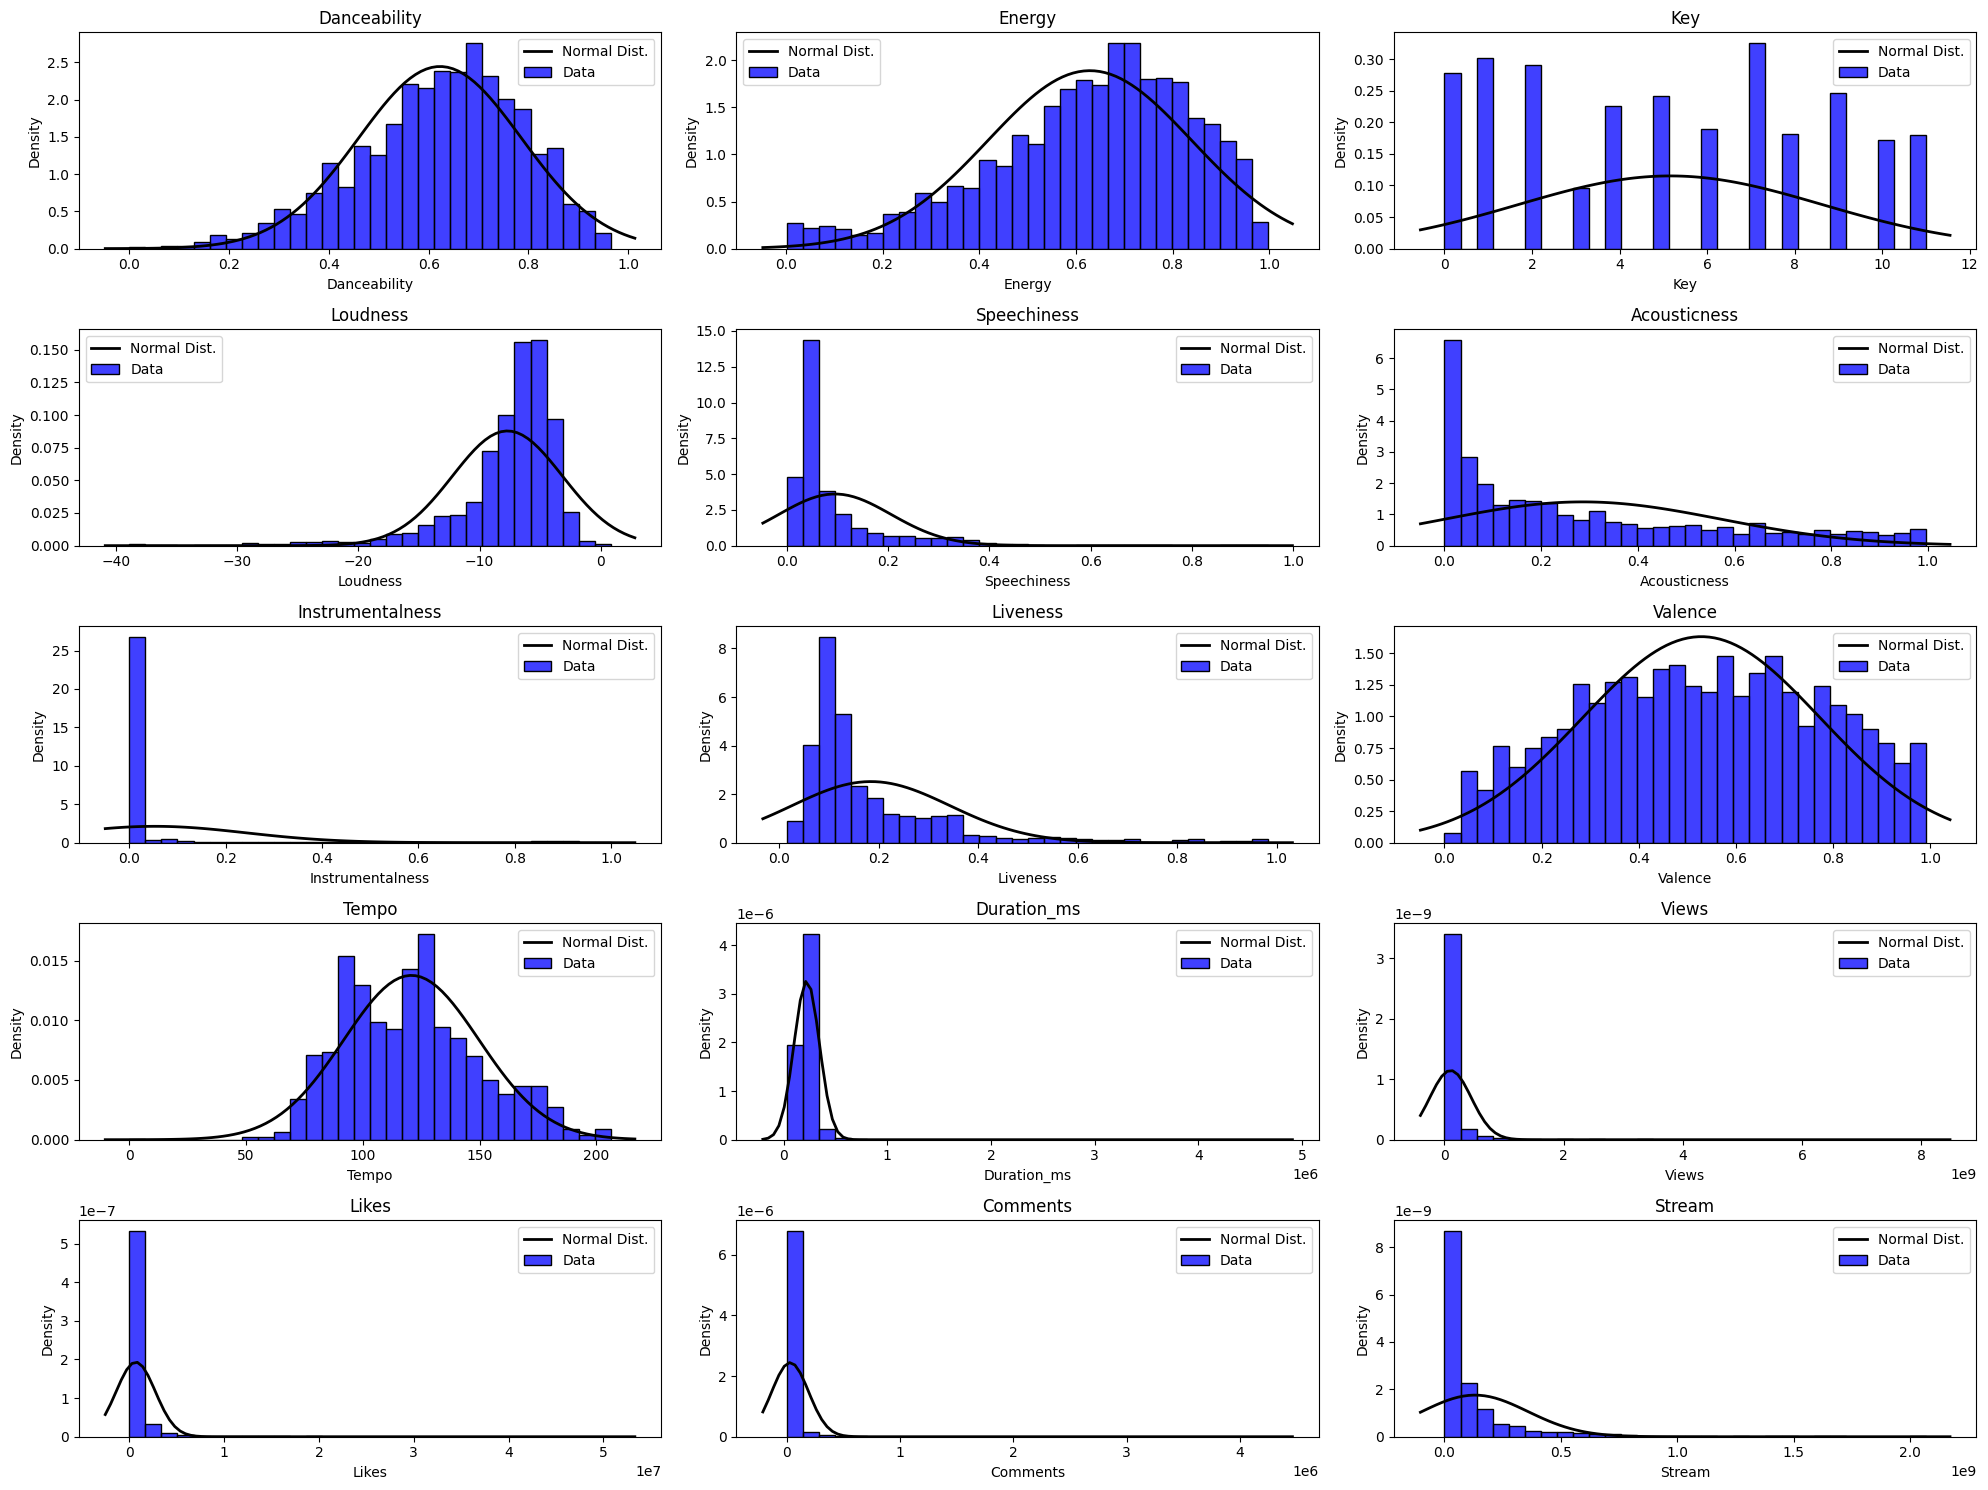

In [33]:
# Calculate means and standard deviations
means = df[numerical_columns].mean()
stds = df[numerical_columns].std()

# Create a grid of subplots
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot histogram
    sns.histplot(df[column], kde=False, stat="density", bins=30, color='blue', label='Data')
    
    # Plot normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, means[column], stds[column])
    
    plt.plot(x, p, 'k', linewidth=2, label='Normal Dist.')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

#### 1. Danceability:
- **Observation**: The distribution of 'Danceability' roughly follows a normal distribution but with noticeable peaks and valleys.
- **Conclusion**: 'Danceability' is approximately normally distributed but has some deviations, indicating that there might be clusters of tracks with certain danceability values.

#### 2. Energy:
- **Observation**: The 'Energy' distribution is somewhat right-skewed and does not closely follow the normal distribution curve.
- **Conclusion**: Tracks tend to have varying levels of energy, with a slight concentration towards higher energy values. 

#### 3. Key:
- **Observation**: The 'Key' distribution does not follow a normal distribution and appears to be quite uniform with several modes.
- **Conclusion**: The musical key of tracks is not normally distributed and seems to be spread across all possible keys. 

#### 4. Loudness:
- **Observation**: 'Loudness' has a distribution that is somewhat skewed to the left and does not closely follow the normal distribution curve.
- **Conclusion**: There is a wide range of loudness levels among tracks, with a higher concentration around certain loudness values, but it's not normally distributed.

#### 5. Speechiness:
- **Observation**: Highly skewed to the right with most values concentrated in lower speechiness.
- **Conclusion**: Most tracks have low speechiness, indicating less spoken word content in the tracks.

#### 6. Acousticness:
- **Observation**: Skewed to the right, with most tracks having low acousticness values.
- **Conclusion**: Most tracks are not acoustic, with a large number of tracks having low acousticness values.

#### 7. Instrumentalness:
- **Observation**: Highly skewed to the right with the majority of values close to zero.
- **Conclusion**: Most tracks lack significant instrumental segments, and instrumental tracks are rare.

#### 8. Liveness:
- **Observation**: 'Liveness' shows right skewing and does not follow a normal distribution closely.
- **Conclusion**: Most tracks have low liveness, indicating that tracks are mostly studio-produced rather than live recordings.

#### 9. Valence:
- **Observation**: The 'Valence' distribution is relatively spread out and follows a normal distribution more closely as compared to others.
- **Conclusion**: Tracks have a wide range of emotional content (from sad to happy), and the valence is quite normally distributed.

#### 10. Tempo:
- **Observation**: 'Tempo' distribution is approximately normal with some peaks, but slightly skewed.
- **Conclusion**: Tracks cover a range of tempos, with slight deviations from a perfect normal distribution, showing a variety of musical paces.

#### 11. Duration_ms:
- **Observation**: Duration in milliseconds shows a heavy skew to the right with most values concentrated at the lower end.
- **Conclusion**: A large number of tracks are shorter in duration, and there are very few extremely long tracks.

#### 12. Views:
- **Observation**: Highly skewed to the right with most values close to zero.
- **Conclusion**: Most tracks have very few views with a small number having exceptionally high views.

#### 13. Likes:
- **Observation**: Highly skewed to the right with most values close to zero.
- **Conclusion**: Most tracks receive few likes, while a small number receive a disproportionately high number of likes.

#### 14. Comments:
- **Observation**: Highly skewed to the right with most values close to zero.
- **Conclusion**: Most tracks receive few comments, indicating low interaction on the majority of tracks.

#### 15. Stream:
- **Observation**: Highly skewed to the right similar to views and likes.
- **Conclusion**: Most tracks have a low number of streams with few tracks having very high stream counts.

### General Conclusion:
- Most of the numerical features show a right-skewed distribution, particularly for popularity-related metrics like Views, Likes, and Comments, indicating few tracks are extremely popular while the majority have low counts.
- Some musical features like 'Valence' and 'Danceability' tend to follow distributions closer to normal, indicating a wide-ranging spread of these properties across tracks.
- Transformations such as log-scaling could be helpful in normalizing these distributions further for better analysis and model performance.

### Let us look at the distribution of the numerical columns as violin plots

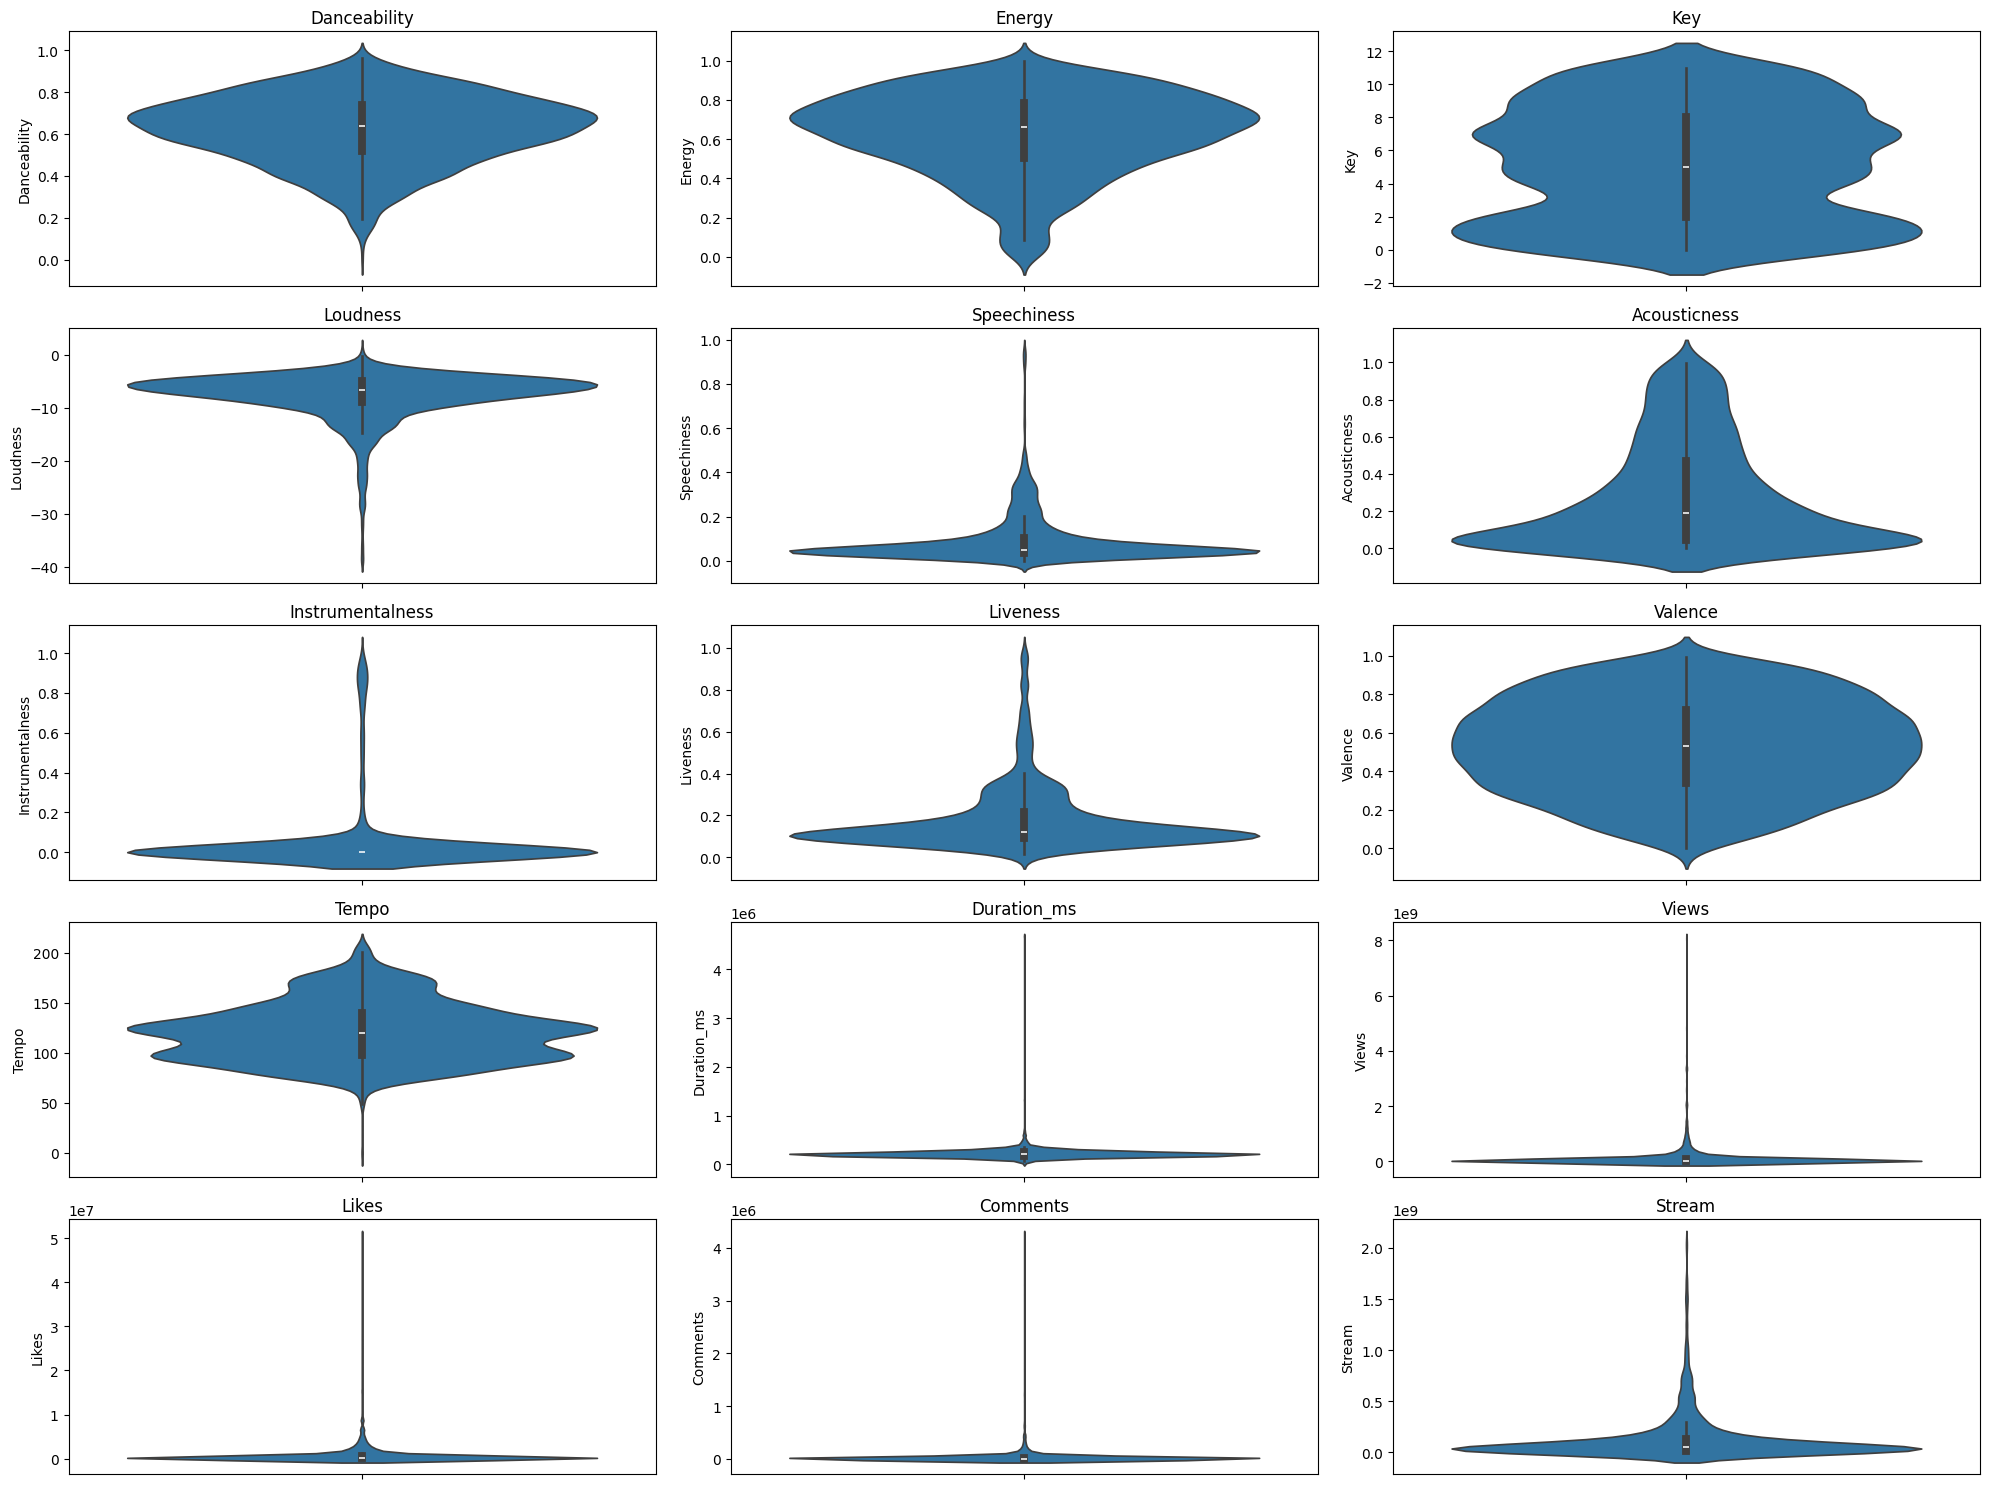

In [34]:
# Create a grid of subplots
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot box plot
    sns.violinplot(y=df[column])
    
    plt.title(f'{column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### These violin plots not only help in understanding the spread and density of data but also effectively highlight the presence of outliers and the central tendency of various numerical features. Let us isolate the outliers from Likes, Views and Stream and see if anything interesting pops up.

In [35]:
def identify_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    non_outliers = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    
    return outliers, non_outliers

In [36]:
# Isolate outliers for Views, Likes, and Streams
views_outliers, views_non_outliers = identify_outliers(df, 'Views')
likes_outliers, likes_non_outliers = identify_outliers(df, 'Likes')
streams_outliers, streams_non_outliers = identify_outliers(df, 'Stream')

print(f"Number of Views Outliers: {views_outliers.shape[0]}")
print(f"Number of Likes Outliers: {likes_outliers.shape[0]}")
print(f"Number of Streams Outliers: {streams_outliers.shape[0]}")

Number of Views Outliers: 256
Number of Likes Outliers: 265
Number of Streams Outliers: 233


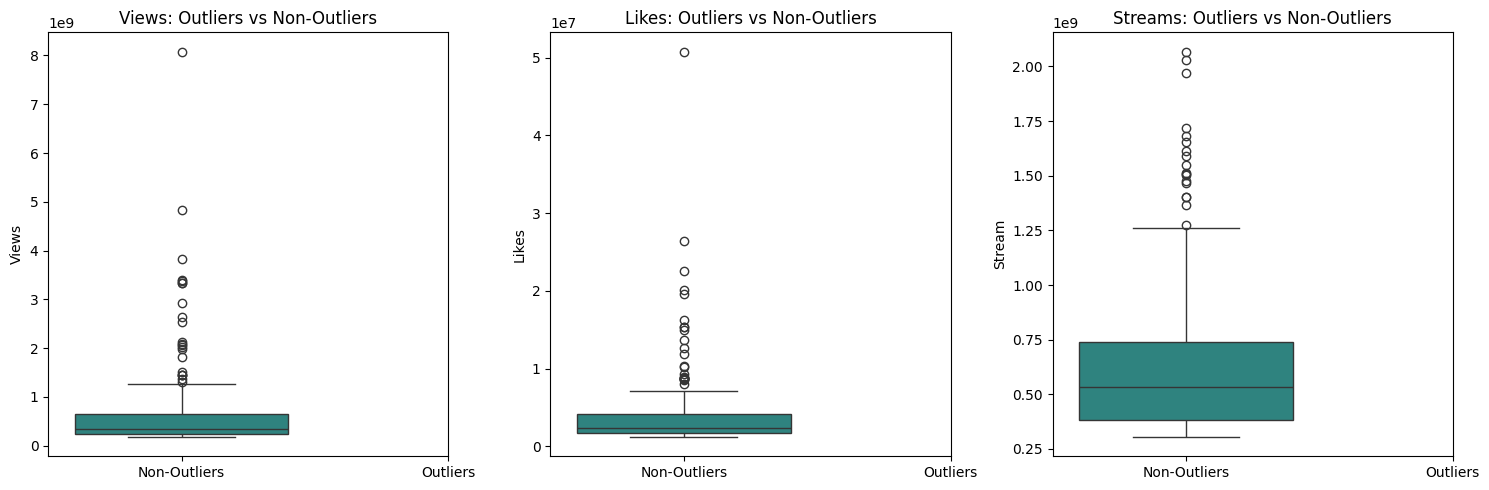

In [37]:
plt.figure(figsize=(15, 5))

# Views
plt.subplot(1, 3, 1)
sns.boxplot(data=[views_non_outliers['Views'], views_outliers['Views']], palette="viridis")
plt.xticks([0, 1], ['Non-Outliers', 'Outliers'])
plt.ylabel('Views')
plt.title('Views: Outliers vs Non-Outliers')

# Likes
plt.subplot(1, 3, 2)
sns.boxplot(data=[likes_non_outliers['Likes'], likes_outliers['Likes']], palette="viridis")
plt.xticks([0, 1], ['Non-Outliers', 'Outliers'])
plt.ylabel('Likes')
plt.title('Likes: Outliers vs Non-Outliers')

# Streams
plt.subplot(1, 3, 3)
sns.boxplot(data=[streams_non_outliers['Stream'], streams_outliers['Stream']], palette="viridis")
plt.xticks([0, 1], ['Non-Outliers', 'Outliers'])
plt.ylabel('Stream')
plt.title('Streams: Outliers vs Non-Outliers')

plt.tight_layout()
plt.show()

In [38]:
# Analyzing Views Outliers
print("Views Outliers Summary Statistics:")
print(views_outliers['Views'].describe())

# Analyzing Likes Outliers
print("\nLikes Outliers Summary Statistics:")
print(likes_outliers['Likes'].describe())

# Analyzing Streams Outliers
print("\nStreams Outliers Summary Statistics:")
print(streams_outliers['Stream'].describe())

# Compare with non-outliers
print("\nViews Non-Outliers Summary Statistics:")
print(views_non_outliers['Views'].describe())

print("\nLikes Non-Outliers Summary Statistics:")
print(likes_non_outliers['Likes'].describe())

print("\nStreams Non-Outliers Summary Statistics:")
print(streams_non_outliers['Stream'].describe())

Views Outliers Summary Statistics:
count    2.560000e+02
mean     6.120656e+08
std      8.087894e+08
min      1.754916e+08
25%      2.350849e+08
50%      3.472369e+08
75%      6.559619e+08
max      8.079649e+09
Name: Views, dtype: float64

Likes Outliers Summary Statistics:
count    2.650000e+02
mean     3.823081e+06
std      4.560032e+06
min      1.202972e+06
25%      1.664052e+06
50%      2.413466e+06
75%      4.110014e+06
max      5.078865e+07
Name: Likes, dtype: float64

Streams Outliers Summary Statistics:
count    2.330000e+02
mean     6.368582e+08
std      3.536018e+08
min      3.047513e+08
25%      3.838961e+08
50%      5.354034e+08
75%      7.371259e+08
max      2.067689e+09
Name: Stream, dtype: float64

Views Non-Outliers Summary Statistics:
count    1.769000e+03
mean     2.720103e+07
std      3.770358e+07
min      7.000000e+00
25%      1.275963e+06
50%      9.572607e+06
75%      3.833906e+07
max      1.710259e+08
Name: Views, dtype: float64

Likes Non-Outliers Summary Statis

#### Conclusions:
- **Significance of Outliers**: The identified outliers in views, likes, and streams represent tracks with extraordinary popularity and engagement. These outliers are not likely to be errors but rather significant data points that indicate tracks with viral or exceptional reach.
  
- **Influence on Metrics**: Including or excluding these outliers can significantly alter summary statistics and subsequent analyses, emphasizing the need to handle them appropriately in modeling and planning.

For further analysis, let's split the data into viral and non_viral datasets.

### Criteria for Viral and Non-Viral:
- Based on the earlier analysis, we identified outliers in `Views`, `Likes`, and `Streams`. These outliers will be considered as the `viral` dataset.
- The rest of the data will be considered as the `non_viral` dataset.

### Step-by-Step Implementation:

1. **Identify Viral Tracks**:
   - Combine the outliers in `Views`, `Likes`, and `Streams` to create a unique list of viral tracks.

2. **Split the Data**:
   - Use the identified viral tracks to split the dataset into `viral` and `non_viral`.


In [39]:
# Combine the indices of viral tracks
viral_indices = pd.concat([views_outliers, likes_outliers, streams_outliers]).index.unique()

# Create viral dataset
viral_df = df.loc[viral_indices]

# Create non_viral dataset
non_viral_df = df.drop(viral_indices)

# Verify the split
print(f"Original dataset size: {df.shape[0]}")
print(f"Viral dataset size: {viral_df.shape[0]}")
print(f"Non-viral dataset size: {non_viral_df.shape[0]}")

Original dataset size: 2025
Viral dataset size: 386
Non-viral dataset size: 1639


### So far we have been looking at the columns individually. It's time we try to find patterns in our data by looking at features together.

### Non-viral analysis

In [40]:
# Before we go ahead with our analysis, let's cap the duration to 1 million milliseconds
# Define a cap for the Duration_ms
duration_cap = 1e6  # 1 million milliseconds (~16.7 minutes)
non_viral_df['Capped_Duration_ms'] = np.where(non_viral_df['Duration_ms'] > duration_cap, duration_cap, non_viral_df['Duration_ms'])


In [41]:
# Calculate the correlation matrix
correlation_matrix = non_viral_df[numerical_columns].corr()

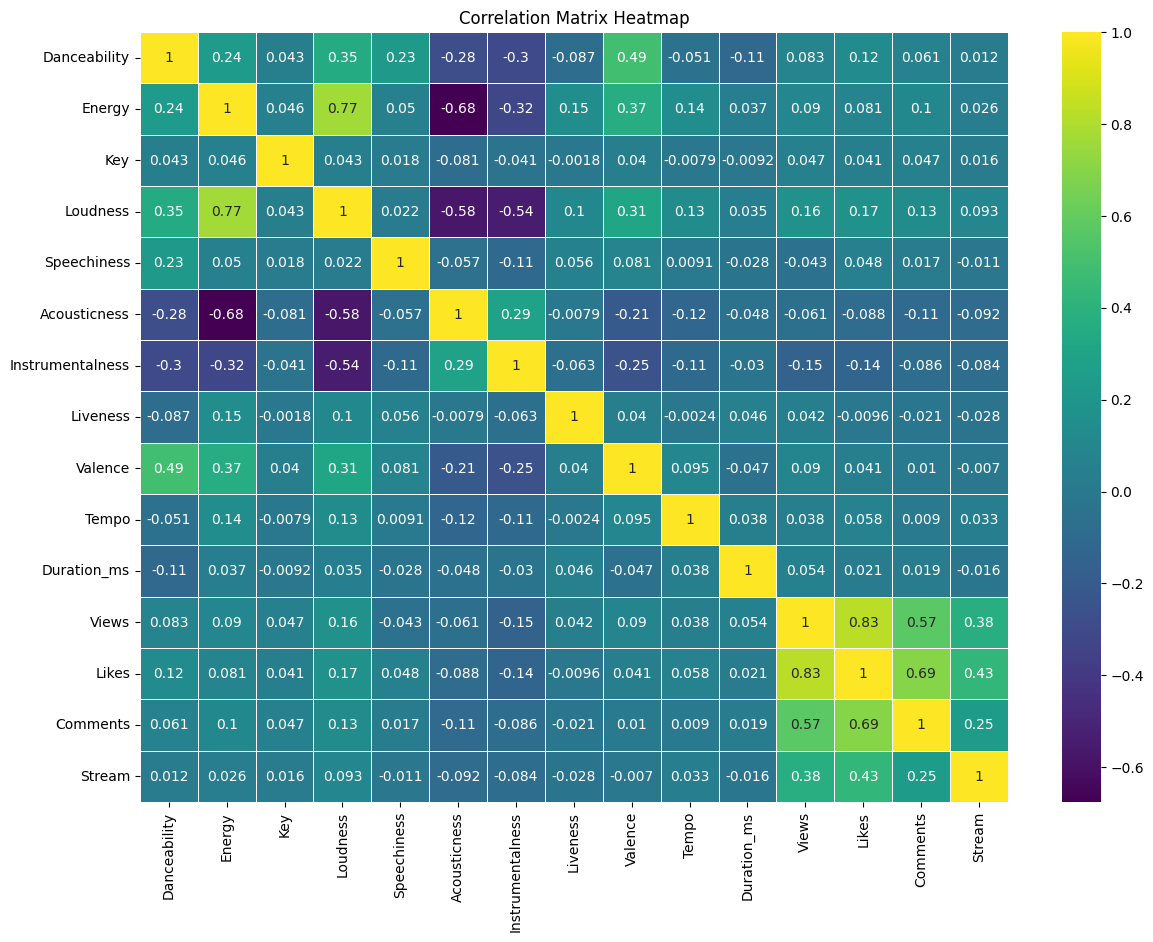

In [42]:
# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
# Identify highly correlated pairs (absolute correlation > 0.7)
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs != 1] # Remove self-correlation
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs > 0.7]
print("Highly Correlated Pairs:\n", highly_correlated_pairs)

Highly Correlated Pairs:
 Views     Likes       0.827277
Likes     Views       0.827277
Energy    Loudness    0.767095
Loudness  Energy      0.767095
dtype: float64


In [44]:
# Select numerical columns (excluding Likes, Views, and Stream because they are the targets)
other_numerical_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
                     'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Capped_Duration_ms']

# Target columns
target_columns = ['Likes', 'Views', 'Stream']

In [45]:
# Custom hexbin function for plotting
def plot_hexbin(data, x, y, gridsize=10, cmap='viridis'):
    plt.hexbin(data[x], data[y], gridsize=gridsize, cmap=cmap, mincnt=1)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.colorbar()#label='Count')

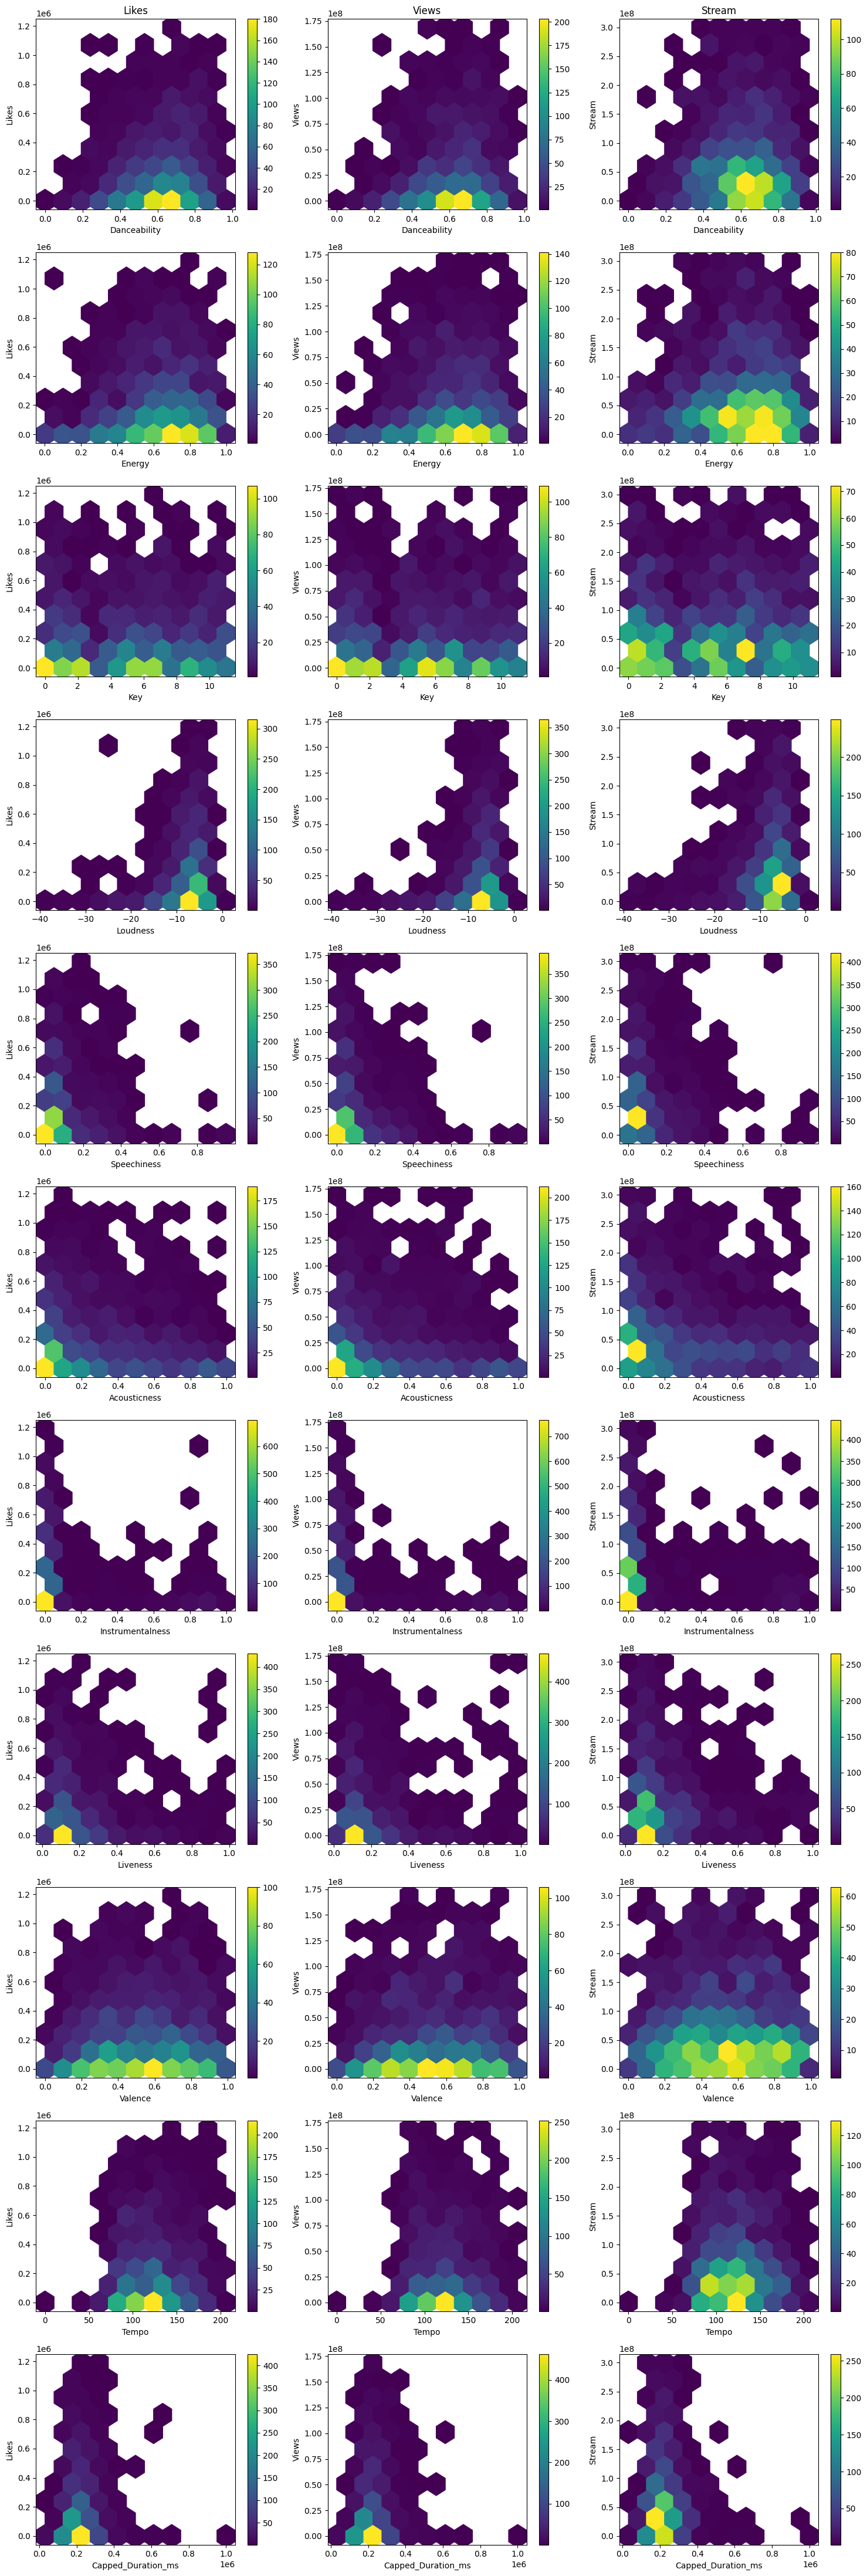

In [46]:
# Number of rows and columns for the plot grid
n_rows = len(other_numerical_columns)
n_cols = len(target_columns)

# Set up the figure size adequately
plt.figure(figsize=(15, n_rows * 4))

# Iterate over rows (features) and columns (targets) to create hexbin plots
for row_idx, feature in enumerate(other_numerical_columns):
    for col_idx, target in enumerate(target_columns):
        plt.subplot(n_rows, n_cols, row_idx * n_cols + col_idx + 1)
        plot_hexbin(non_viral_df, feature, target)
        if row_idx == 0: 
            plt.title(target)
        # if col_idx == 0:
        #     plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Okay, the non-viral visualization gave us some very important insights.
1. **Danceability**:
   - **Observation**: Tracks with higher danceability (around 0.6 to 0.8) tend to receive more likes, views, and streams. 
   - **Guideline**: Aim for a high danceability score to make the song more engaging and danceable, which can attract more listeners and interactions.

2. **Energy**:
   - **Observation**: High energy levels (around 0.6 to 0.8) are associated with higher likes, views, and streams. 
   - **Guideline**: Target a moderate to high energy level in the song to keep the listeners engaged and energized.

3. **Key**:
   - **Observation**: No specific key shows a significant advantage in terms of likes, views, and streams, indicating that key selection is flexible.
   - **Guideline**: Focus on other musical aspects, as the key does not significantly impact the song’s popularity.

4. **Loudness**:
   - **Observation**: Very loud tracks (close to 0 dB) tend to receive more likes, views, and streams. However, excessive loudness can be perceived as noise.
   - **Guideline**: Maintain a balanced loudness level to ensure clarity and attractiveness without making it excessively loud or noisy.

5. **Speechiness**:
   - **Observation**: Tracks with lower speechiness (indicating less spoken word content) tend to perform better in terms of likes, views, and streams.
   - **Guideline**: Minimize spoken word content to focus more on musical elements.

6. **Acousticness**:
   - **Observation**: Lower acousticness scores are generally associated with more likes, views, and streams, suggesting a preference for electronically produced music.
   - **Guideline**: Favor electronic production over acoustic elements unless the target audience specifically prefers acoustic music.

7. **Instrumentalness**:
   - **Observation**: Tracks with lower instrumentalness (zero to low values) tend to receive more likes, views, and streams.
   - **Guideline**: Include vocals or lyrics to make the song more appealing and engaging, as purely instrumental tracks have a narrower audience.

8. **Liveness**:
   - **Observation**: Tracks with moderate liveness levels show better performance in terms of likes, views, and streams.
   - **Guideline**: Aim for a balance by incorporating some live elements into the production, which can add an authentic feel to the track.

9. **Valence**:
   - **Observation**: Tracks with neutral to high valence scores (indicating more positive or happy sounds) tend to get more likes, views, and streams.
   - **Guideline**: Create a positive or happy atmosphere in the song to attract more listeners.

10. **Tempo**:
    - **Observation**: Tracks with a mid-range tempo (around 100 to 130 BPM) tend to receive more likes, views, and streams.
    - **Guideline**: Aim for a tempo in the common range of 100-130 BPM for broader appeal.

11. **Duration**:
    - **Observation**: Tracks with a moderate length (capped at around 600,000 ms or roughly 10 minutes) perform better in terms of likes, views, and streams.
    - **Guideline**: Keep the song duration within a standard range (around 3 to 5 minutes) for optimal engagement.

### Implementation Guidelines:

1. **Focus on Danceability and Energy**:
   - Create tracks that are both danceable and energetic to captivate your audience.

2. **Avoid Monotony in Key**:
   - Experiment with different keys but ensure that the key chosen complements the mood and theme of the song.

3. **Optimize Loudness**:
   - Maintain a balanced loudness level to please listeners without causing discomfort.

4. **Balance Acoustic and Electronic Elements**:
   - While electronic elements are popular, balance them with some acoustic sounds for variety.

5. **Incorporate Vocals**:
   - Include compelling and engaging vocal elements to broaden appeal.

6. **Engaging Lyrics**:
   - Ensure the lyrics resonate with the audience, contributing to the song’s emotional impact.

### Conclusion:
The hexbin plots reveal that certain features like danceability, energy, and loudness play significant roles in the popularity of a song, measured through likes, views, and streams. By optimizing these features and keeping in mind the preferences indicated by the data, you can create songs that have a higher potential for success.

### Time to check the viral songs dataset.

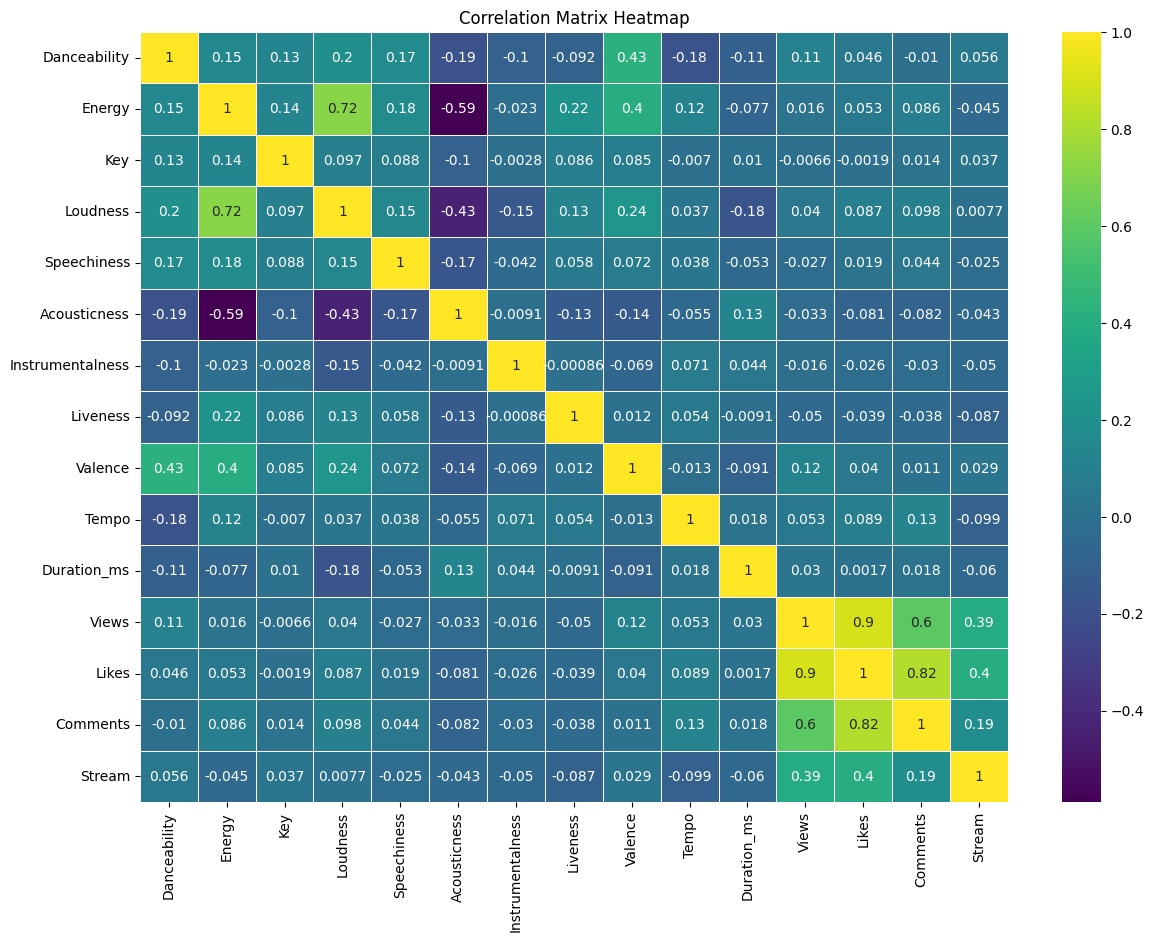

In [47]:
# Calculate the correlation matrix
correlation_matrix = viral_df[numerical_columns].corr()
# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
# Identify highly correlated pairs (absolute correlation > 0.7)
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs != 1] # Remove self-correlation
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs > 0.7]
print("Highly Correlated Pairs:\n", highly_correlated_pairs)

Highly Correlated Pairs:
 Views     Likes       0.898956
Likes     Views       0.898956
          Comments    0.816297
Comments  Likes       0.816297
Energy    Loudness    0.718100
Loudness  Energy      0.718100
dtype: float64


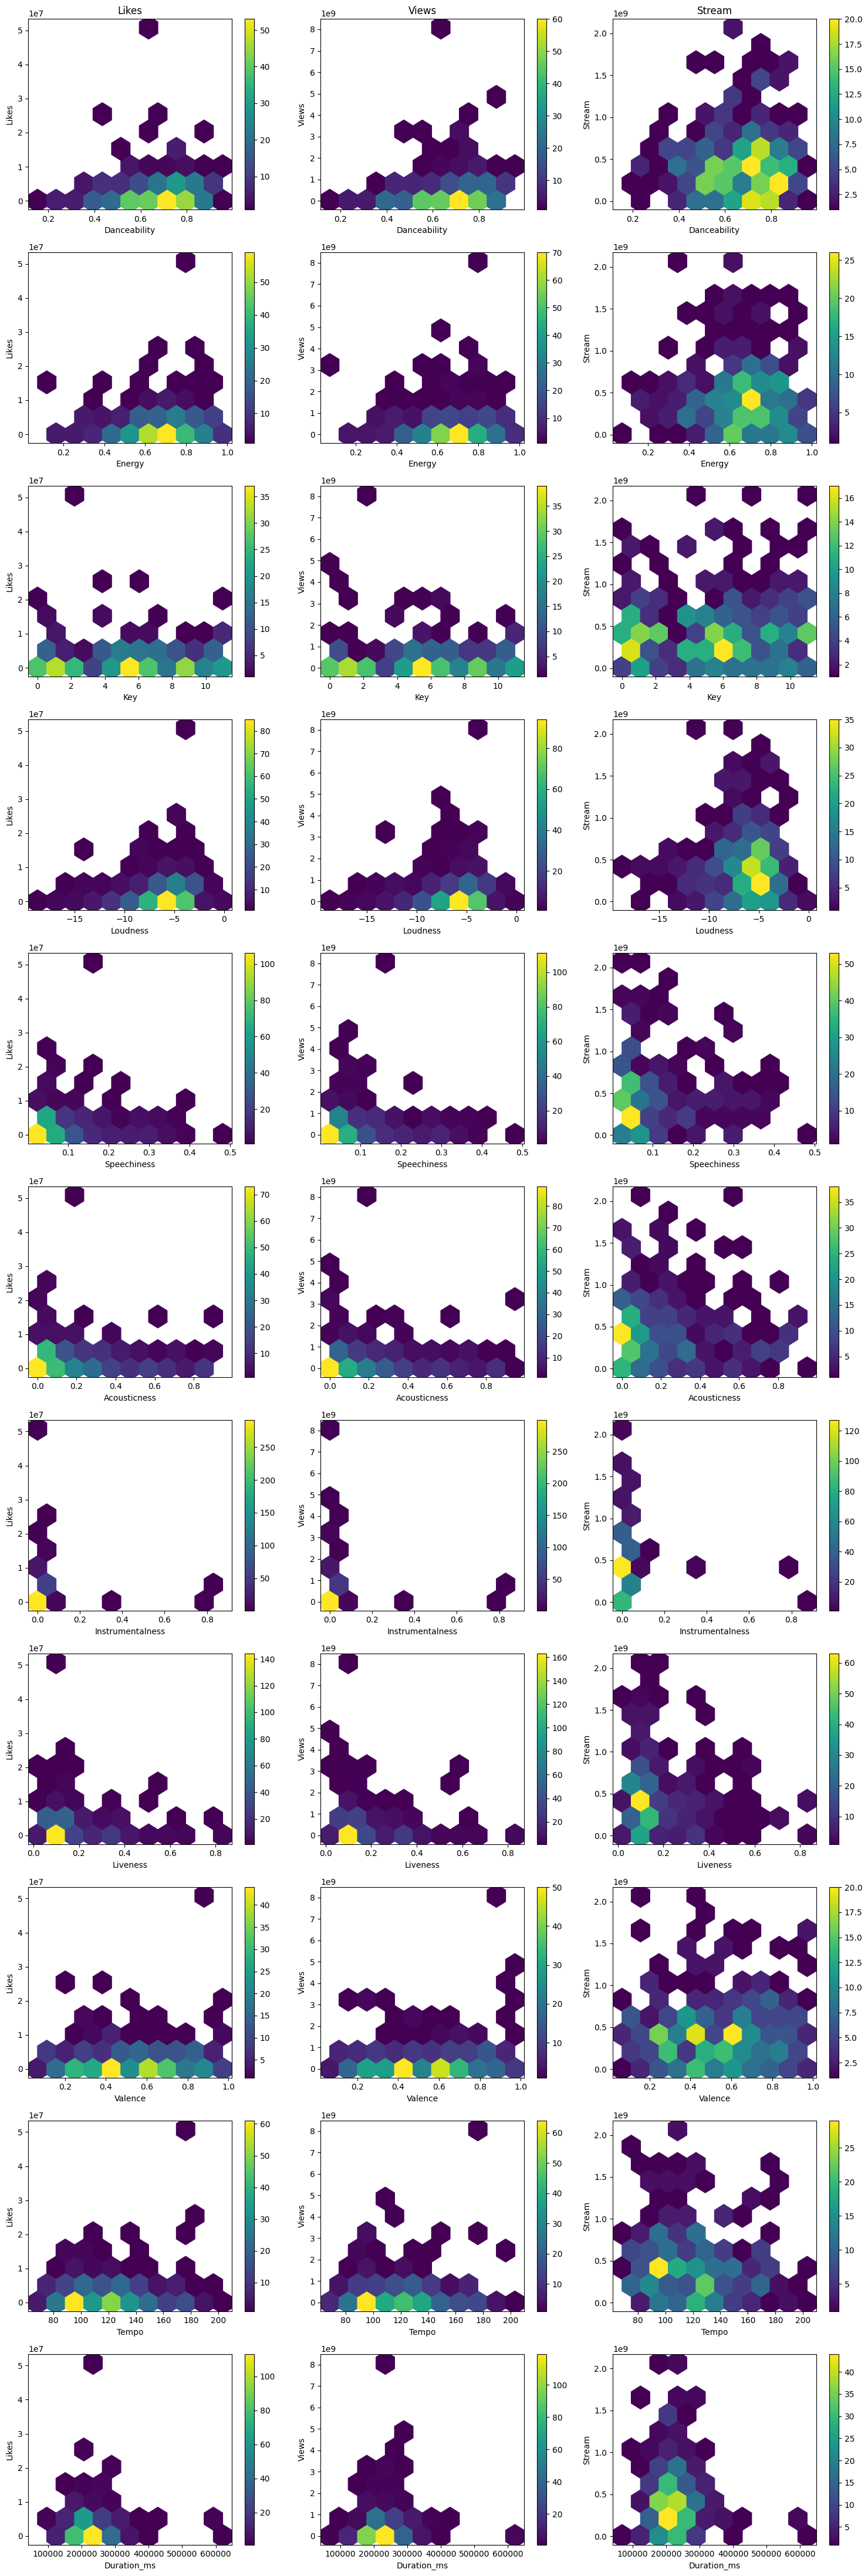

In [49]:
# Select numerical columns (excluding Likes, Views, and Stream because they are the targets)
other_numerical_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
                     'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

# Target columns
target_columns = ['Likes', 'Views', 'Stream']
# Number of rows and columns for the plot grid
n_rows = len(other_numerical_columns)
n_cols = len(target_columns)

# Set up the figure size adequately
plt.figure(figsize=(15, n_rows * 4))

# Iterate over rows (features) and columns (targets) to create hexbin plots
for row_idx, feature in enumerate(other_numerical_columns):
    for col_idx, target in enumerate(target_columns):
        plt.subplot(n_rows, n_cols, row_idx * n_cols + col_idx + 1)
        plot_hexbin(viral_df, feature, target)
        if row_idx == 0: 
            plt.title(target)
        # if col_idx == 0:
        #     plt.ylabel(feature)

plt.tight_layout()
plt.show()

### The viral songs with extra-ordinary likes and views share some similarlity with the other songs. The only stark difference is in the Duration field. All songs in this category are strictly 11 minutes or less.

## Comparative Analysis

#### Let's see the 5 most viewed artist in the non-viral category!

In [50]:
# Aggregated statistics by Artist
artist_aggregations = non_viral_df.groupby('Artist')[numerical_columns].agg(['mean', 'median'])
artist_aggregations = artist_aggregations.sort_values(('Likes', 'mean'), ascending=False)
artist_aggregations.head()


Danceability        Energy          Key        Loudness  \
                        mean median   mean median  mean median     mean   
Artist                                                                    
Shreya Ghoshal         0.533  0.533  0.436  0.436   5.0    5.0   -7.521   
Ajay-Atul              0.340  0.340  0.960  0.960   1.0    1.0   -5.427   
Lata Mangeshkar        0.247  0.247  0.556  0.556  11.0   11.0   -7.514   
King                   0.918  0.918  0.673  0.673   0.0    0.0   -5.084   
Rammstein              0.681  0.681  0.912  0.912   0.0    0.0   -4.159   

                       Speechiness         Acousticness            \
                median        mean  median         mean    median   
Artist                                                              
Shreya Ghoshal  -7.521      0.0276  0.0276     0.234000  0.234000   
Ajay-Atul       -5.427      0.0802  0.0802     0.238000  0.238000   
Lata Mangeshkar -7.514      0.0376  0.0376     0.635000  0.635000   
King            -5.084      0.1840  0.1840     0.314000  0.314000   
Rammstein       -4.159      0.0912  0.0912     0.000757  0.000757   

                Instrumentalness           Liveness         Valence         \
                            mean    median     mean  median    mean median   
Artist                                                                       
Shreya Ghoshal          0.000003  0.000003   0.4600  0.4600   0.371  0.371   
Ajay-Atul               0.000004  0.000004   0.0378  0.0378   0.475  0.475   
Lata Mangeshkar         0.000436  0.000436   0.1460  0.1460   0.371  0.371   
King                    0.000000  0.000000   0.0555  0.0555   0.828  0.828   
Rammstein               0.001360  0.001360   0.3590  0.3590   0.479  0.479   

                   Tempo          Duration_ms                  Views  \
                    mean   median        mean    median         mean   
Artist                                                                 
Shreya Ghoshal   146.868  146.868    308158.0  308158.0  131716526.0   
Ajay-Atul        150.040  150.040    356827.0  356827.0  135043316.0   
Lata Mangeshkar  168.823  168.823    265927.0  265927.0  153436569.0   
King              99.952   99.952    163200.0  163200.0   45074766.0   
Rammstein        125.031  125.031    231603.0  231603.0   65241757.0   

                                  Likes            Comments           \
                      median       mean     median     mean   median   
Artist                                                                 
Shreya Ghoshal   131716526.0  1124402.0  1124402.0  20864.0  20864.0   
Ajay-Atul        135043316.0  1090420.0  1090420.0  26365.0  26365.0   
Lata Mangeshkar  153436569.0  1086047.0  1086047.0  33339.0  33339.0   
King              45074766.0  1052593.0  1052593.0  66723.0  66723.0   
Rammstein         65241757.0  1027446.0  1027446.0   3369.0   3369.0   

                      Stream               
                        mean       median  
Artist                                     
Shreya Ghoshal    49993575.0   49993575.0  
Ajay-Atul         18408687.0   18408687.0  
Lata Mangeshkar   18643171.0   18643171.0  
King              39538638.0   39538638.0  
Rammstein        150724437.0  150724437.0

### And the top 5 albums

In [51]:
# Aggregated statistics by Album
album_aggregations = non_viral_df.groupby('Album')[numerical_columns].agg(['mean', 'median'])
album_aggregations = album_aggregations.sort_values(('Likes', 'mean'), ascending=False)
album_aggregations.head()

Danceability        Energy  \
                                                       mean median   mean   
Album                                                                       
Geççek                                                0.671  0.671  0.835   
Soulful Sonu Nigam Specials                           0.533  0.533  0.436   
Me & U                                                0.758  0.758  0.725   
Agneepath (Original Motion Picture Soundtrack)        0.340  0.340  0.960   
Veer - Zaara                                          0.247  0.247  0.556   

                                                        Key        Loudness  \
                                               median  mean median     mean   
Album                                                                         
Geççek                                          0.835   7.0    7.0   -4.852   
Soulful Sonu Nigam Specials                     0.436   5.0    5.0   -7.521   
Me & U                                          0.725   8.0    8.0   -4.800   
Agneepath (Original Motion Picture Soundtrack)  0.960   1.0    1.0   -5.427   
Veer - Zaara                                    0.556  11.0   11.0   -7.514   

                                                      Speechiness          \
                                               median        mean  median   
Album                                                                       
Geççek                                         -4.852      0.2370  0.2370   
Soulful Sonu Nigam Specials                    -7.521      0.0276  0.0276   
Me & U                                         -4.800      0.0385  0.0385   
Agneepath (Original Motion Picture Soundtrack) -5.427      0.0802  0.0802   
Veer - Zaara                                   -7.514      0.0376  0.0376   

                                               Acousticness          \
                                                       mean  median   
Album                                                                 
Geççek                                               0.0751  0.0751   
Soulful Sonu Nigam Specials                          0.2340  0.2340   
Me & U                                               0.0817  0.0817   
Agneepath (Original Motion Picture Soundtrack)       0.2380  0.2380   
Veer - Zaara                                         0.6350  0.6350   

                                               Instrumentalness            \
                                                           mean    median   
Album                                                                       
Geççek                                                 0.000000  0.000000   
Soulful Sonu Nigam Specials                            0.000003  0.000003   
Me & U                                                 0.000000  0.000000   
Agneepath (Original Motion Picture Soundtrack)         0.000004  0.000004   
Veer - Zaara                                           0.000436  0.000436   

                                               Liveness         Valence  \
                                                   mean  median    mean   
Album                                                                     
Geççek                                           0.1800  0.1800   0.714   
Soulful Sonu Nigam Specials                      0.4600  0.4600   0.371   
Me & U                                           0.2020  0.2020   0.708   
Agneepath (Original Motion Picture Soundtrack)   0.0378  0.0378   0.475   
Veer - Zaara                                     0.1460  0.1460   0.371   

                                                         Tempo           \
                                               median     mean   median   
Album                                                                     
Geççek                                          0.714  179.979  179.979   
Soulful Sonu Nigam Specials                     0.371  146.868  146.868   
Me & U            

### Now for the viral dataframe

In [52]:
# Aggregated statistics by Artist
artist_aggregations = viral_df.groupby('Artist')[numerical_columns].agg(['mean', 'median'])
artist_aggregations = artist_aggregations.sort_values(('Likes', 'mean'), ascending=False)
artist_aggregations.head()

Danceability         Energy          Key        Loudness          \
                    mean  median   mean median  mean median     mean  median   
Artist                                                                         
Luis Fonsi        0.7115  0.7115  0.663  0.663   1.5    1.5  -5.7725 -5.7725   
BLACKPINK         0.6680  0.6680  0.828  0.828   4.0    4.0  -5.0340 -5.0340   
Mark Ronson       0.8560  0.8560  0.609  0.609   0.0    0.0  -7.2230 -7.2230   
Steve Aoki        0.6060  0.6060  0.850  0.850  11.0   11.0  -3.9520 -3.9520   
Alan Walker       0.4950  0.4950  0.662  0.662   3.5    3.5  -5.1865 -5.1865   

            Speechiness          Acousticness          Instrumentalness  \
                   mean   median         mean   median             mean   
Artist                                                                    
Luis Fonsi      0.09675  0.09675      0.49400  0.49400         0.000000   
BLACKPINK       0.07390  0.07390      0.03600  0.03600         0.000000   
Mark Ronson     0.08240  0.08240      0.00801  0.00801         0.000082   
Steve Aoki      0.18300  0.18300      0.01140  0.01140         0.000001   
Alan Walker     0.07530  0.07530      0.02860  0.02860         0.000004   

                      Liveness         Valence            Tempo            \
               median     mean  median    mean median      mean    median   
Artist                                                                      
Luis Fonsi   0.000000   0.1335  0.1335   0.678  0.678  148.9405  148.9405   
BLACKPINK    0.000000   0.0932  0.0932   0.393  0.393  140.0420  140.0420   
Mark Ronson  0.000082   0.0344  0.0344   0.928  0.928  114.9880  114.9880   
Steve Aoki   0.000001   0.2060  0.2060   0.542  0.542  170.0100  170.0100   
Alan Walker  0.000004   0.2145  0.2145   0.197  0.197  174.7085  174.7085   

            Duration_ms                   Views                     Likes  \
                   mean    median          mean        median        mean   
Artist                                                                      
Luis Fonsi     225653.5  225653.5  4.197918e+09  4.197918e+09  25930697.5   
BLACKPINK      211350.0  211350.0  2.012855e+09  2.012855e+09  22570280.0   
Mark Ronson    269667.0  269667.0  4.821016e+09  4.821016e+09  20067879.0   
Steve Aoki     307676.0  307676.0  1.300861e+09  1.300861e+09  19663558.0   
Alan Walker    203033.0  203033.0  1.948746e+09  1.948746e+09  17870246.5   

                          Comments                   Stream                
                 median       mean     median          mean        median  
Artist                                                                     
Luis Fonsi   25930697.5  2134820.0  2134820.0  8.372204e+08  8.372204e+08  
BLACKPINK    22570280.0  3312226.0  3312226.0  5.657543e+08  5.657543e+08  
Mark Ronson  20067879.0   598916.0   598916.0  1.653820e+09  1.653820e+09  
Steve Aoki   19663558.0  3109122.0  3109122.0  2.683191e+08  2.683191e+08  
Alan Walker  17870246.5   784310.0   784310.0  1.106367e+09  1.106367e+09

In [53]:
# Aggregated statistics by Album
album_aggregations = viral_df.groupby('Album')[numerical_columns].agg(['mean', 'median'])
album_aggregations = album_aggregations.sort_values(('Likes', 'mean'), ascending=False)
album_aggregations.head()

Danceability        Energy          Key         \
                                 mean median   mean median  mean median   
Album                                                                     
VIDA                            0.655  0.655  0.797  0.797   2.0    2.0   
Different World                 0.468  0.468  0.627  0.627   6.0    6.0   
SQUARE UP                       0.668  0.668  0.828  0.828   4.0    4.0   
Uptown Special                  0.856  0.856  0.609  0.609   0.0    0.0   
Love Yourself 結 'Answer'        0.606  0.606  0.850  0.850  11.0   11.0   

                         Loudness        Speechiness         Acousticness  \
                             mean median        mean  median         mean   
Album                                                                       
VIDA                       -4.787 -4.787      0.1530  0.1530      0.19800   
Different World            -5.085 -5.085      0.0476  0.0476      0.02810   
SQUARE UP                  -5.034 -5.034      0.0739  0.0739      0.03600   
Uptown Special             -7.223 -7.223      0.0824  0.0824      0.00801   
Love Yourself 結 'Answer'   -3.952 -3.952      0.1830  0.1830      0.01140   

                                  Instrumentalness           Liveness          \
                           median             mean    median     mean  median   
Album                                                                           
VIDA                      0.19800         0.000000  0.000000   0.0670  0.0670   
Different World           0.02810         0.000008  0.000008   0.1100  0.1100   
SQUARE UP                 0.03600         0.000000  0.000000   0.0932  0.0932   
Uptown Special            0.00801         0.000082  0.000082   0.0344  0.0344   
Love Yourself 結 'Answer'  0.01140         0.000001  0.000001   0.2060  0.2060   

                         Valence           Tempo          Duration_ms  \
                            mean median     mean   median        mean   
Album                                                                   
VIDA                       0.839  0.839  177.928  177.928    229360.0   
Different World            0.159  0.159  179.642  179.642    212107.0   
SQUARE UP                  0.393  0.393  140.042  140.042    211350.0   
Uptown Special             0.928  0.928  114.988  114.988    269667.0   
Love Yourself 結 'Answer'   0.542  0.542  170.010  170.010    307676.0   

                                           Views                     Likes  \
                            median          mean        median        mean   
Album                                                                        
VIDA                      229360.0  8.079649e+09  8.079649e+09  50788652.0   
Different World           212107.0  3.400742e+09  3.400742e+09  26446178.0   
SQUARE UP                 211350.0  2.012855e+09  2.012855e+09  22570280.0   
Uptown Special            269667.0  4.821016e+09  4.821016e+09  20067879.0   
Love Yourself 結 'Answer'  307676.0  1.300861e+09  1.300861e+09  19663558.0   

                                       Comments                   Stream  \
                              median       mean     median          mean   
Album                                                                      
VIDA                      50788652.0  4252791.0  4252791.0  1.506598e+09   
Different World           26446178.0  1250054.0  1250054.0  1.683178e+09   
SQUARE UP                 22570280.0  3312226.0  3312226.0  5.657543e+08   
Uptown Special            20067879.0   598916.0   598916.0  1.653820e+09   
Love Yourself 結 'Answer'  19663558.0  3109122.0  3109122.0  2.683191e+08   

                                        
                                median  
Album                                   
VIDA                      1.506598e+09  
Different World           1.683178e+09  
SQUARE UP                 5.657543e+08  
Uptown Special            1.653820e+09  
Love Yourself 結 'Answer'  2.683191e+08

In [54]:
# Function to add mean and median lines
def add_mean_median_lines(df, x, y, ax, category_colors):
    # Get the unique categories and their respective colors
    categories = df[x].unique()
    # category_colors = {category: color for category, color in zip(categories, sns.color_palette("tab10", len(categories)))}
    
    # Calculate means and medians
    means = df.groupby(x)[y].mean()
    medians = df.groupby(x)[y].median()
    
    # Iterate over categories and plot mean/median lines within each violin plot
    for i, category in enumerate(categories):
        mean_val = means[category]
        median_val = medians[category]
        ax.axhline(y=mean_val, 
                #    xmin=i/len(categories), 
                #    xmax=(i+1)/len(categories), 
                   color=category_colors[category], linestyle='--', linewidth=2, label=f'{category} Mean' if ax.get_legend() is None else "")
        ax.axhline(y=median_val, 
                #    xmin=i/len(categories), 
                #    xmax=(i+1)/len(categories), 
                   color=category_colors[category], linestyle='-', linewidth=2, label=f'{category} Median' if ax.get_legend() is None else "")


#### Non viral Tracks

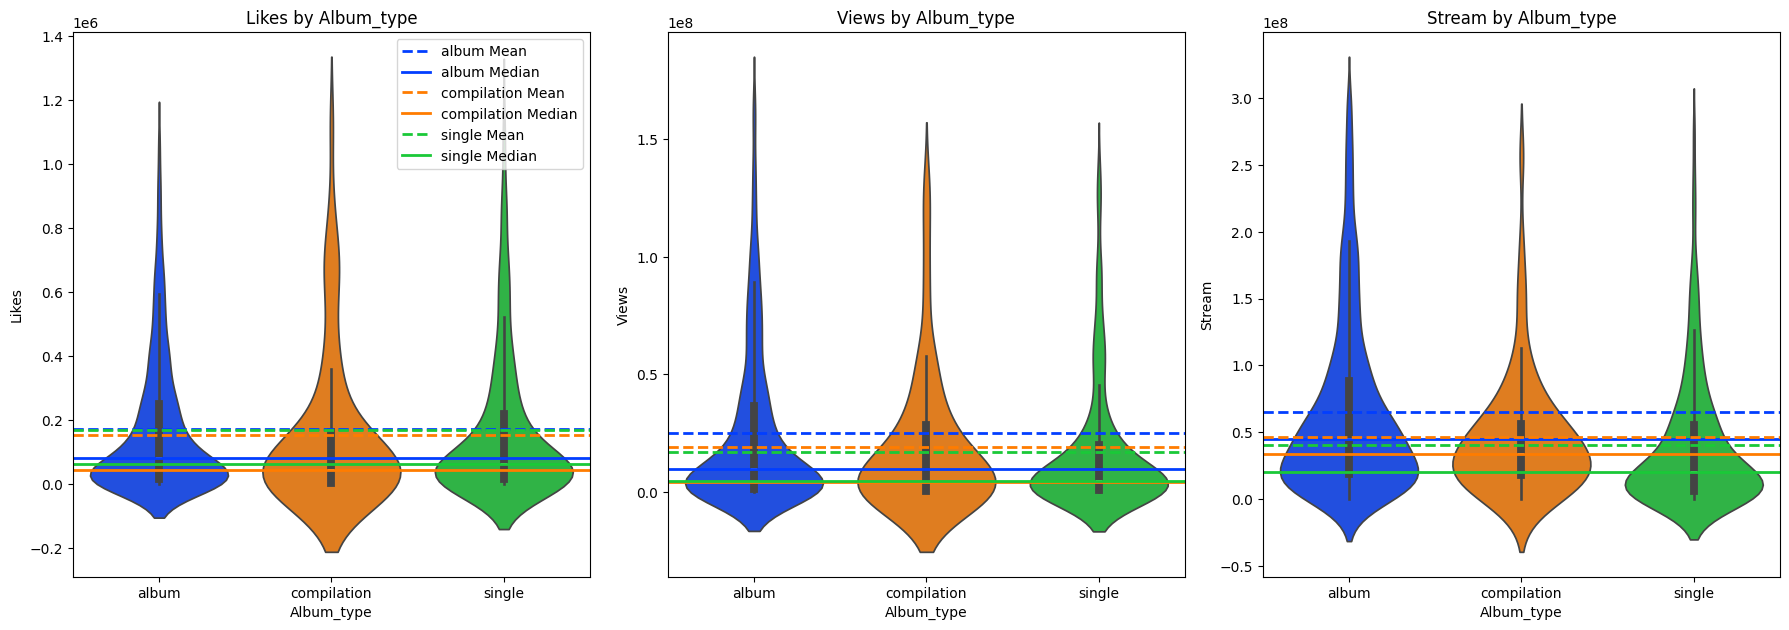

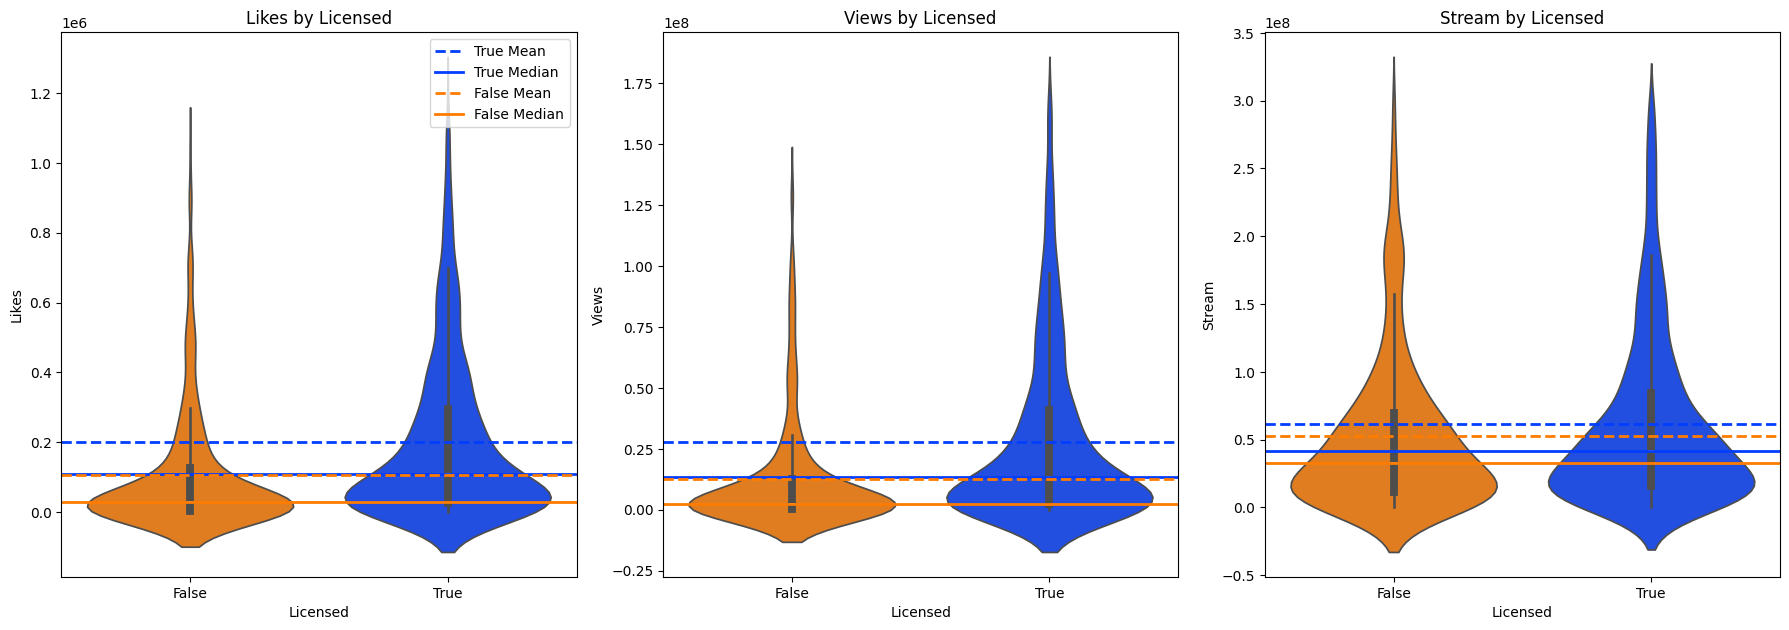

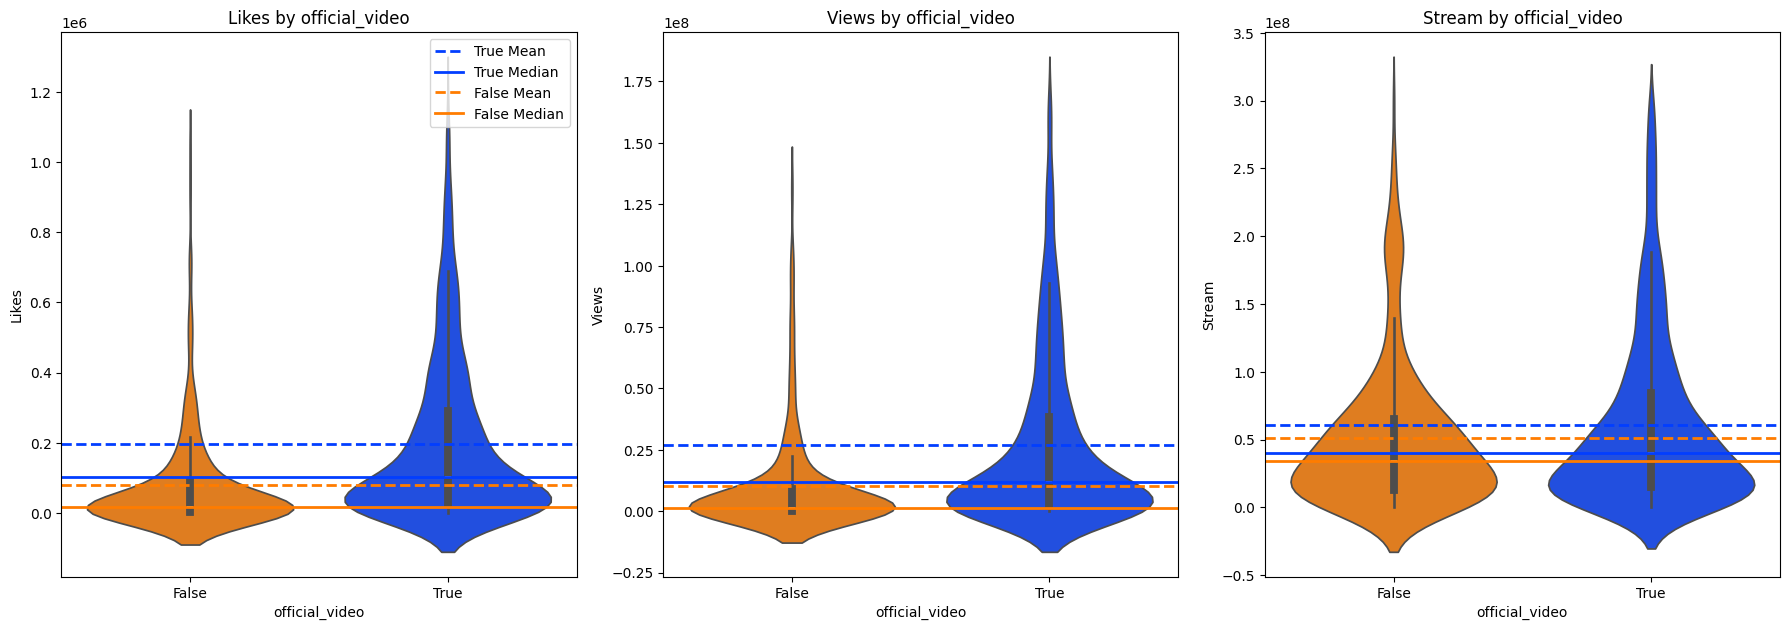

In [57]:
# Comparative analysis based on categorical variables
categorical_columns = ['Album_type', 'Licensed', 'official_video']

# Comparative analysis with violin plots and mean/median lines
for cat_col in categorical_columns:
    plt.figure(figsize=(18, 12))
    
    categories = non_viral_df[cat_col].unique()
    palette = sns.color_palette("bright", len(categories))
    category_colors = dict(zip(categories, palette))
    
    for i, num_col in enumerate(target_columns, 1):
        ax = plt.subplot(2, 3, i)
        sns.violinplot(x=cat_col, y=num_col, data=non_viral_df, palette=category_colors, hue=cat_col, legend=False)
        add_mean_median_lines(non_viral_df, cat_col, num_col, ax, category_colors)
        plt.title(f'{num_col} by {cat_col}')
        
        # Collect handles for legend only once
        if i == 1:
            handles, labels = ax.get_legend_handles_labels()
            # Deduplicate labels and handles
            unique_labels_handles = {label: handle for handle, label in zip(handles, labels)}
            plt.legend(unique_labels_handles.values(), unique_labels_handles.keys(), loc='upper right')
        else:
            plt.legend([], [], frameon=False)
    
    plt.tight_layout()
    plt.show()

### According to the group comparative analysis, we see there are significant advantages to Likes, Views, and Streaming if album types are singles or albums compared to compilations. Tracks classified as singles or albums generally show higher means and medians for Likes, Views, and Streams. Furthermore, the presence of a licensed track or an official video also positively influences these metrics. 

Here are the specific insights:

### Album Type:
1. **Singles**: 
   - **Likes**: Singles show a higher median and mean for likes compared to compilations, indicating they tend to be more favored.
   - **Views**: Interestingly, views for Singles and Compilations are very similar. Indicating releasing Singles generally doesn't have an effect on Views.
   - **Streams**: Singles also have a higher median and mean for Streams than Compilations.
   
2. **Albums**: 
   - **Likes**: Albums outperform both Singles and compilations in terms of median and mean likes.
   - **Views**: Albums show a strong performance in views, being higher than singles.
   - **Streams**: Streams for albums are significantly higher than compilations and Singles, indicating sustained listening.

3. **Compilations**: 
   - Generally underperform in all metrics compared to singles and albums, both in terms of likes, views, and streams. This suggests that listeners might prefer original album releases or single tracks over compilations.

### Licensed Tracks:
1. **Licensed (True)**:
   - **Likes**: Licensed tracks tend to have higher median and mean likes than unlicensed tracks.
   - **Views**: Licensed tracks also show higher mean and median views, which might be due to better promotion or distribution.
   - **Streams**: Similar trends are observed for streams, suggesting licensed tracks generally have higher engagement.

2. **Unlicensed (False)**:
   - Tracks not marked as licensed show lower means and medians across likes, views, and streams. This suggests a disadvantage in engagement for unlicensed tracks.

### Official Videos:
1. **With Official Video (True)**:
   - **Likes**: Tracks with official videos have significantly higher median and mean values for likes, indicating that visual content boosts listener engagement.
   - **Views**: Views are markedly higher for tracks with official videos.
   - **Streams**: Tracks with official videos also have higher streaming numbers, highlighting the role of videos in driving listeners to stream the track more frequently.

2. **Without Official Video (False)**:
   - Tracks without official videos tend to have lower engagement metrics across likes, views, and streams. This emphasizes the importance of including videos as part of the track's promotional strategy.

### Conclusion:
The analysis highlights the importance of publishing tracks as singles or albums rather than compilations to maximize likes, views, and streams. Additionally, securing licensing and releasing official videos are crucial strategies in boosting engagement and reaching a wider audience. These insights can help music producers and marketers optimize their release strategies for better listener engagement and interaction. 

By considering these factors during the production and release phases, artists and producers can more effectively capture listener interest and enhance their tracks’ performance on digital platforms.

#### Viral Tracks

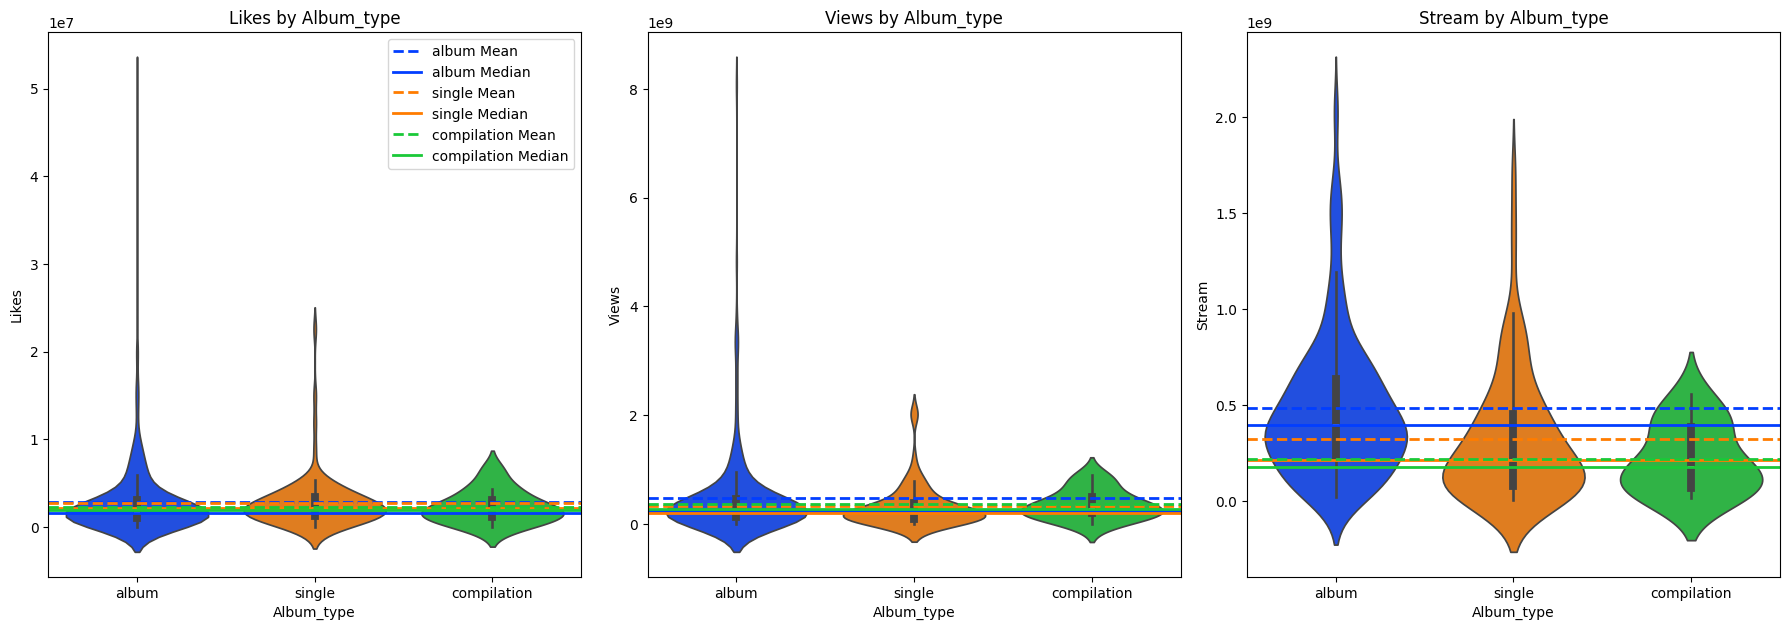

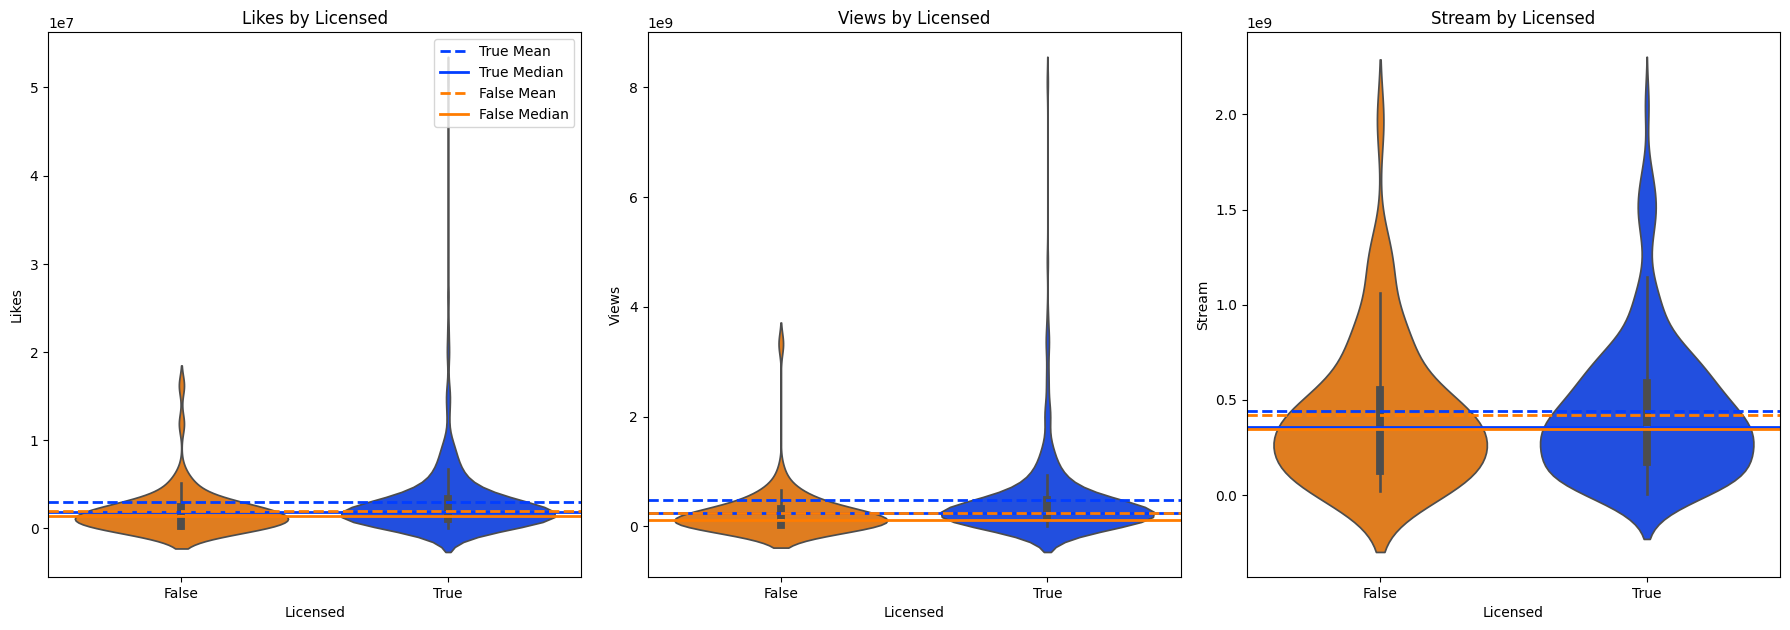

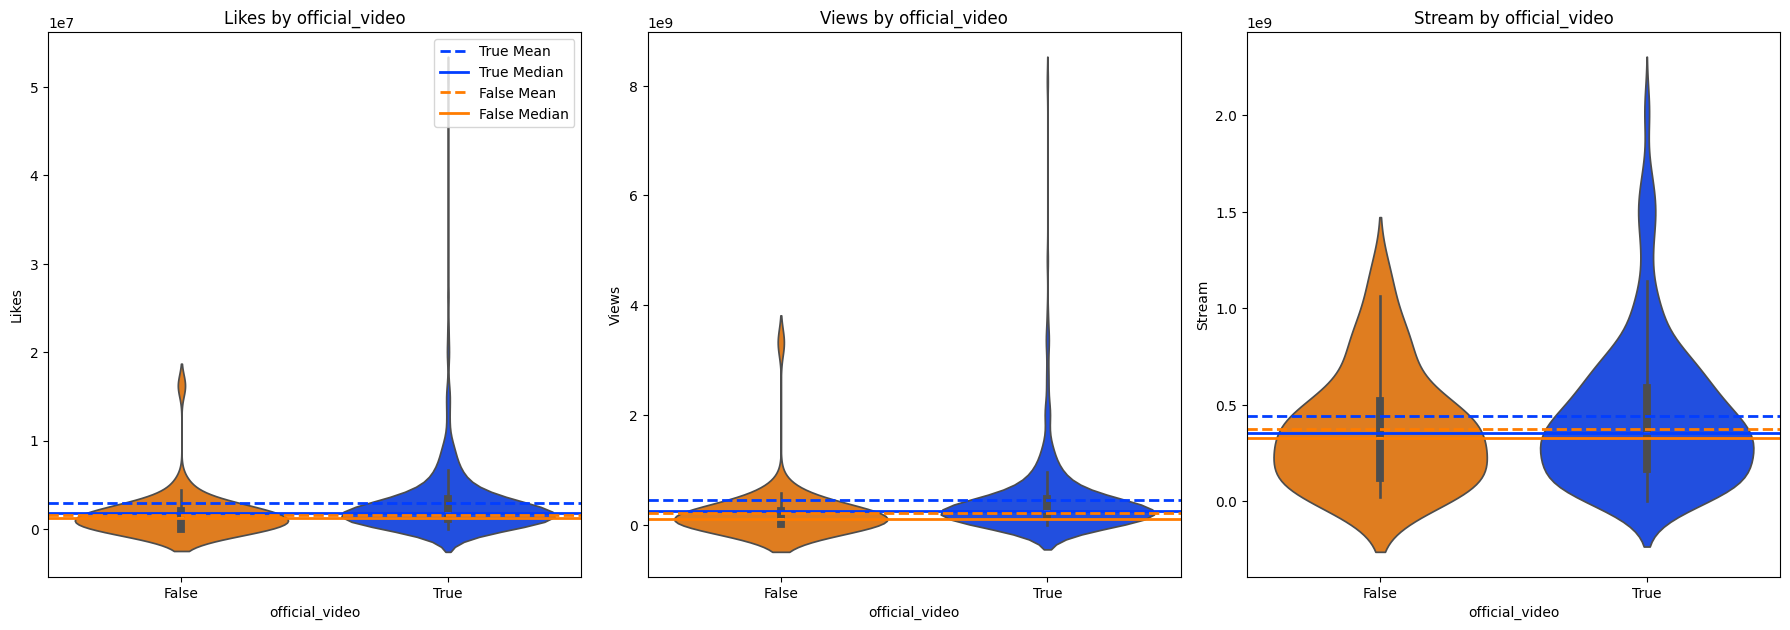

In [56]:
# Comparative analysis based on categorical variables
categorical_columns = ['Album_type', 'Licensed', 'official_video']

# Comparative analysis with violin plots and mean/median lines
for cat_col in categorical_columns:
    plt.figure(figsize=(18, 12))

    categories = viral_df[cat_col].unique()
    palette = sns.color_palette("bright", len(categories))
    category_colors = dict(zip(categories, palette))
    
    for i, num_col in enumerate(target_columns, 1):
        ax = plt.subplot(2, 3, i)
        sns.violinplot(x=cat_col, y=num_col, data=viral_df, palette=category_colors, hue=cat_col, legend=False)
        add_mean_median_lines(viral_df, cat_col, num_col, ax, category_colors)
        plt.title(f'{num_col} by {cat_col}')
        
        # Collect handles for legend only once
        if i == 1:
            handles, labels = ax.get_legend_handles_labels()
            # Deduplicate labels and handles
            unique_labels_handles = {label: handle for handle, label in zip(handles, labels)}
            plt.legend(unique_labels_handles.values(), unique_labels_handles.keys(), loc='upper right')
        else:
            plt.legend([], [], frameon=False)
    
    plt.tight_layout()
    plt.show()

### Very close medians suggest for viral tracks, it's more luck than an optimizing challenge. Most of the factors(Singles, Compilations, Official Videos, Licensing) doesn't affect the engagement factors. We cannot draw much conclusion if some of these categories affect virality.

## Hypothesis testing 

To determine if the observed differences between groups are statistically significant, we can use several statistical tests:

1. **T-tests**: Used to compare the means of two groups.
2. **ANOVA (Analysis of Variance)**: Used to compare the means of three or more groups.

We'll use these tests to evaluate:
1. If there are significant differences in `Likes`, `Views`, and `Stream` based on `Album_type`.
2. If licensing (`Licensed`) and having an official video (`official_video`) significantly affect these metrics.



In [66]:
# Function to perform t-tests between two groups
def perform_ttest(group_col, num_col):
    groups = non_viral_df[group_col].unique()
    if len(groups) == 2:  # Proceed only if there are exactly two groups
        group1 = non_viral_df[non_viral_df[group_col] == groups[0]][num_col]
        group2 = non_viral_df[non_viral_df[group_col] == groups[1]][num_col]
        t_stat, p_val = ttest_ind(group1, group2)
        result = 'significant' if p_val < 0.05 else 'not significant'
        print(f'T-test for {num_col} by {group_col}: t-statistic = {t_stat:.2f}, p-value = {p_val:.2f} - Result: {result}')
    else:
        print(f'T-test not performed for {num_col} by {group_col}: Requires exactly two groups, found {len(groups)} groups.')


In [67]:
# Perform t-tests for selected features based on 'Licensed' and 'official_video'
for num_col in target_columns:
    perform_ttest('Licensed', num_col)
    perform_ttest('official_video', num_col)

T-test for Likes by Licensed: t-statistic = 8.52, p-value = 0.00 - Result: significant
T-test for Likes by official_video: t-statistic = 9.52, p-value = 0.00 - Result: significant
T-test for Views by Licensed: t-statistic = 9.15, p-value = 0.00 - Result: significant
T-test for Views by official_video: t-statistic = 8.79, p-value = 0.00 - Result: significant
T-test for Stream by Licensed: t-statistic = 2.63, p-value = 0.01 - Result: significant
T-test for Stream by official_video: t-statistic = 2.77, p-value = 0.01 - Result: significant


In [68]:
# Function to perform ANOVA between groups
def perform_anova(group_col, num_col):
    groups = non_viral_df[group_col].unique()
    if len(groups) > 2:  # Proceed only if there are more than two groups
        samples = [non_viral_df[non_viral_df[group_col] == group][num_col] for group in groups]
        f_stat, p_val = f_oneway(*samples)
        result = 'significant' if p_val < 0.05 else 'not significant'
        print(f'ANOVA for {num_col} by {group_col}: F-statistic = {f_stat:.2f}, p-value = {p_val:.2f} - Result: {result}')
    else:
        print(f'ANOVA not performed for {num_col} by {group_col}: ANOVA requires more than two groups, found {len(groups)} groups.')


In [69]:
# Perform ANOVA for selected features based on 'Album_type'
for num_col in target_columns:
    perform_anova('Album_type', num_col)

ANOVA for Likes by Album_type: F-statistic = 0.20, p-value = 0.82 - Result: not significant
ANOVA for Views by Album_type: F-statistic = 9.15, p-value = 0.00 - Result: significant
ANOVA for Stream by Album_type: F-statistic = 26.01, p-value = 0.00 - Result: significant


### Conclusion of Comparative and Hypothesis Testing Analysis

The comparative analysis and hypothesis testing reveal several key insights regarding the factors that significantly impact Likes, Views, and Streams for music tracks. 

### Key Findings:

1. **Licensed Tracks**:
   - **Likes**: T-test results show a significant difference, with licensed tracks having significantly higher likes (t-statistic = 8.52, p-value = 0.00).
   - **Views**: Licensed tracks also have significantly higher views (t-statistic = 9.15, p-value = 0.00).
   - **Streams**: The number of streams is significantly higher for licensed tracks (t-statistic = 2.63, p-value = 0.01).

2. **Official Videos**:
   - **Likes**: Tracks with official videos show significantly higher likes (t-statistic = 9.52, p-value = 0.00).
   - **Views**: These tracks also have significantly higher views (t-statistic = 8.79, p-value = 0.00).
   - **Streams**: The presence of an official video significantly boosts stream counts (t-statistic = 2.77, p-value = 0.01).

3. **Album Type**:
   - **Likes**: ANOVA results show no significant difference in likes based on album type (F-statistic = 0.20, p-value = 0.82).
   - **Views**: There is a significant difference in views among different album types, with singles and albums generally outperforming compilations (F-statistic = 9.15, p-value = 0.00).
   - **Streams**: Stream counts also significantly differ among album types, favoring singles and albums over compilations (F-statistic = 26.01, p-value = 0.00).

### Actionable Insights:

1. **Focus on Licensing**:
   - Securing licensing for tracks is crucial, as licensed tracks show significantly higher engagement metrics across likes, views, and streams.
   
2. **Invest in Official Videos**:
   - Producing and releasing official videos can substantially enhance audience engagement, boosting likes, views, and streaming numbers.

3. **Optimize Release Strategy**:
   - While releasing tracks as singles or albums can significantly impact views and stream counts, it does not significantly influence likes. This suggests that while format influences broader reach and sustained listens, the initial liking metric might be influenced by other factors.

### Summary:
The findings provide strong evidence that licensing and producing official videos are critical factors in boosting track performance on digital platforms. Album type significantly affects views and streams but has no substantial impact on likes. These insights can help music producers, artists, and marketers design strategies to maximize audience engagement and interaction, ultimately enhancing the track's performance and popularity.